# **1/ Centrality Measures: Betweenness, Closeness, PageRank Centrality**

### Create a graph

In [51]:
import numpy as np

A = np.array([[0,1,1,1,0,0,0,0,0],
              [1,0,1,0,0,0,0,0,0],
              [1,1,0,1,0,0,0,0,0],
              [1,0,1,0,1,1,0,0,0],
              [0,0,0,1,0,1,1,1,0],
              [0,0,0,1,1,0,1,1,0],
              [0,0,0,0,1,1,0,1,1],
              [0,0,0,0,1,1,1,0,0],
              [0,0,0,0,0,0,1,0,0]])

mat_size = len(A)
print("Size Graph: ", mat_size,":")
print(A)

Size Graph:  9 :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


## 1.1/ Betweenness Centrality

In [4]:
# Using NetworkX only to calculate the shortest path:
import networkx as nx

temp = A.copy()

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

In [5]:
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

pow_size = int(step_mat.max())+1
A_powers = [np.linalg.matrix_power(A,m) for m in range(1,pow_size)]

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [7]:
A_powers
sigma = np.zeros((mat_size,mat_size))
sigma

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
min_lengths = np.zeros((mat_size,mat_size))
min_lengths

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
for i in range(mat_size):
    for j in range(mat_size):
        for x in range(pow_size-1):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

print("Sigma Matrix:")
print(sigma)
print("Min Lengths Matrix:")
print(min_lengths)


Sigma Matrix:
[[0. 1. 1. 1. 1. 1. 2. 2. 2.]
 [1. 0. 1. 2. 2. 2. 4. 4. 4.]
 [1. 1. 0. 1. 1. 1. 2. 2. 2.]
 [1. 2. 1. 0. 1. 1. 2. 2. 2.]
 [1. 2. 1. 1. 0. 1. 1. 1. 1.]
 [1. 2. 1. 1. 1. 0. 1. 1. 1.]
 [2. 4. 2. 2. 1. 1. 0. 1. 1.]
 [2. 4. 2. 2. 1. 1. 1. 0. 1.]
 [2. 4. 2. 2. 1. 1. 1. 1. 0.]]
Min Lengths Matrix:
[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [10]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)

In [11]:
def betweenness_centrality(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(mat_size):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [12]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Betweenness Centralities of the Graph: \n", betweennessCentralityValues)

Betweenness Centralities of the Graph: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]


## 1.2/ Closeness Centrality

In [16]:
# calculate the shortest path:
import networkx as nx
import numpy as np

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
# Calculate between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

def sum_of_row(graph, a):
    degSum = 0
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum

def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    
    # dividing the (n-1) nodes
    result = ((mat_size-1)/closeSum)
    
    return result

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [17]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Closeness Centralities: \n", closenessCentralityValues)

Closeness Centralities: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]


## 1.3/ PageRank Centrality

In [21]:
import pandas as pd

#Read nodes and edges datasets
nodes = pd.read_csv('./data/Nodes.csv')
edges = pd.read_csv('./data/Edges.csv')

In [22]:
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to'])['weight'].sum().reset_index()
edges.head(5)

,from,to,weight
0,1,2,22
1,1,3,22
2,1,4,21
3,1,15,20
4,2,1,23


In [23]:
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.Graph())

In [24]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)


{1: 0.08510275171090052,
 2: 0.07036723548249191,
 3: 0.07210878220106506,
 4: 0.07793068159840727,
 15: 0.05086993441701706,
 9: 0.055565198429846537,
 10: 0.05703894111148803,
 5: 0.04910224124242256,
 8: 0.05483671362647849,
 11: 0.030132480983098633,
 12: 0.05929092165421931,
 6: 0.06038211879945627,
 17: 0.05616702153345073,
 16: 0.05330205121583224,
 7: 0.0558770073826599,
 14: 0.05866910324143484,
 13: 0.05325681536973059}

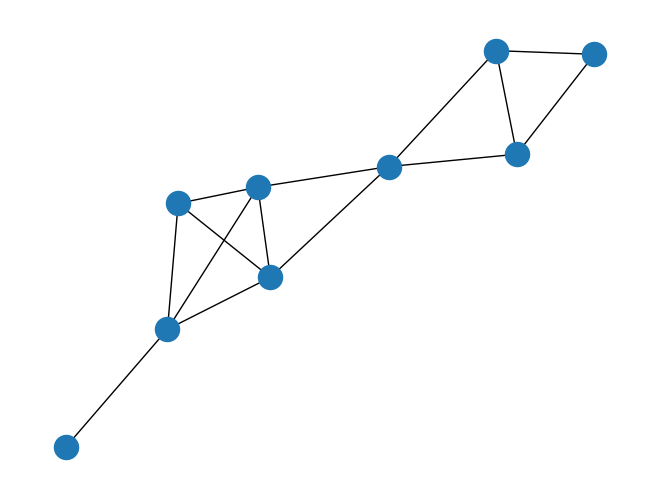

In [26]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
nx.draw(temp_Graph)

In [50]:
import numpy as np
import scipy as sp

def mypagerank(G,alpha=0.85, max_iter=100,tol=1.0e-6):
    
    N = len(G)
    nodelist = list(G)
    A = nx.to_scipy_sparse_array(G, nodelist=nodelist, dtype=float)
    S = A.sum(axis=1)
    S[S != 0] = 1.0 / S[S != 0]
    Q = sp.sparse.csr_array(sp.sparse.spdiags(S.T, 0, *A.shape))
    A = Q @ A
    # initial vector
    x = np.repeat(1.0 / N, N)
    p = np.repeat(1.0 / N, N)
    
    dangling_weights = p
    is_dangling = np.where(S == 0)[0]
    for _ in range(max_iter):
        xlast = x
        x = alpha * (x @ A + sum(x[is_dangling]) * dangling_weights) + (1 - alpha) * p
        #l1 norm
        err = np.absolute(x - xlast).sum()
        if err < N * tol:
            return dict(zip(nodelist, map(float, np.round(x,4))))

In [28]:
mypagerank(G)

{1: 0.0851,
 2: 0.0704,
 3: 0.0721,
 4: 0.0779,
 15: 0.0509,
 9: 0.0556,
 10: 0.057,
 5: 0.0491,
 8: 0.0548,
 11: 0.0301,
 12: 0.0593,
 6: 0.0604,
 17: 0.0562,
 16: 0.0533,
 7: 0.0559,
 14: 0.0587,
 13: 0.0533}

# **2/ Graph Measurements: Conductance, Modularity, Clustering Coefficients**

## 2.1/ Conductance



Conductance of two sets is 3.3333333333333335


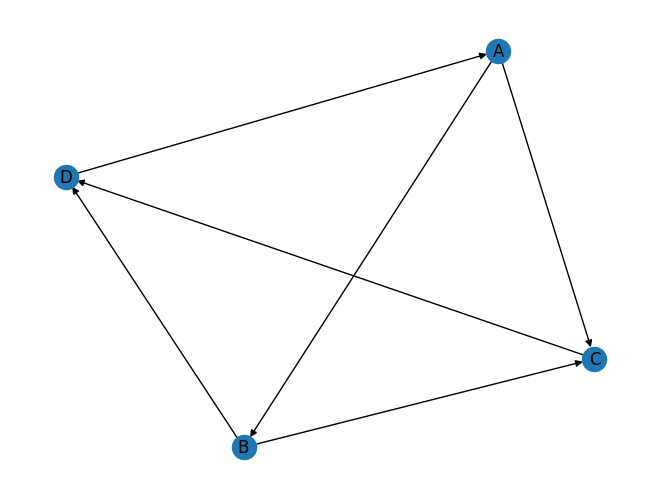

In [62]:
from itertools import chain

def cut_size(G, S, T=None, weight=None):
    edges = nx.edge_boundary(G, S, T, data=weight, default=1)
    if G.is_directed():
        edges = chain(edges, nx.edge_boundary(G, T, S, data=weight, default=1))
    return sum(weight for u, v, weight in edges)

def volume(G, S, weight=None):
    degree = G.out_degree if G.is_directed() else G.degree
    return sum(d for v, d in degree(S, weight=weight))

def conductance(G, S, T=None, weight=None):
    if T is None:
        T = set(G) - set(S)
    num_cut_edges = cut_size(G, S, T, weight=weight)
    volume_S = volume(G, S, weight=weight)
    volume_T = volume(G, T, weight=weight)
    return num_cut_edges / min(volume_S, volume_T)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edge('A', 'B', weight=1.0)
G.add_edge('B', 'C', weight=2.0)
G.add_edge('C', 'D', weight=1.0)
G.add_edge('D', 'A', weight=2.0)
G.add_edge('A', 'C', weight=3.0)
G.add_edge('B', 'D', weight=3.0)

nx.draw(G, with_labels=True)

# Define a set of nodes
S = {'A', 'B'}
T = {'C', 'D'}
# Calculate the conductance of the set of nodes
cond = conductance(G, S, T, weight='weight')

print(f"Conductance of two sets is {cond}")

## 2.2/ Modularity

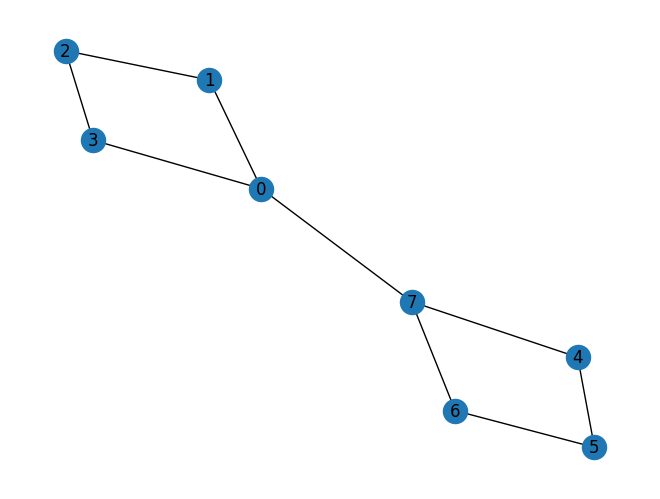

In [45]:
# Construct a graph as follow:

G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

nx.draw(G, with_labels=True)

In [43]:
# define a modularity function

def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [46]:
# pre-define a partition
partition = [
    {0,1, 2, 3},
    {4, 5, 6,7},
]

modularity(G, partition)

0.3888888888888889

### Compare the modularity module with community library

In [47]:
import community.community_louvain as comm

bp = comm.best_partition(G)
comm.modularity(bp,G)

0.38888888888888884

### Let's compare this to a partition we would suspect to have higher modularity:

In [48]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, partition_2)

0.3888888888888889

## 2.3/ Clustering Coefficients

In [30]:
from collections import Counter
from itertools import chain, combinations

# Calculate degree of a node
def degree_(G, nodes=None):
    if nodes is None:
        nodes_nbrs = G.adj.items()
    else:
        nodes_nbrs = ((n, G[n]) for n in G.nbunch_iter(nodes))

    for v, v_nbrs in nodes_nbrs:
        vs = set(v_nbrs) - {v}
        gen_degree = Counter(len(vs & (set(G[w]) - {w})) for w in vs)
        ntriangles = sum(k * val for k, val in gen_degree.items())
        yield (v, len(vs), ntriangles, gen_degree)

In [33]:
# Compute the local clustering coefficient for nodes where the input graph is from networkx.
def local_clustering(G, nodes=None):
    td_iter = degree_(G, nodes)
    clusterc = {v: 0 if t == 0 else t / (d * (d - 1)) for v, d, t, _ in td_iter}
    if nodes in G:
        # Return the value of the sole entry in the dictionary.
        return clusterc[nodes]
    return clusterc

In [34]:
karate_graph = nx.karate_club_graph()

local_clustering(karate_graph, nodes = 0)


0.15

In [35]:
print(nx.clustering(karate_graph, 0))

0.15


In [36]:
# Compute the average clustering coefficient for nodes where the input graph is from networkx.
def average_clustering(G, nodes=None, count_zeros=True):
    c = local_clustering(G, nodes).values()
    if not count_zeros:
        c = [v for v in c if abs(v) > 0]
    return sum(c) / len(c)

In [37]:
average_clustering(karate_graph)

0.5706384782076823

# **3/Additional Metrics: Jaccard’s Coefficient, Katz Index**

## 3.1/ Jaccard’s Coefficient

In [69]:
# Define graph
G = nx.read_edgelist('./data/edge_list.txt')

# Relabel nodes from string to int
mapping = {f'{i}': i for i in range(11)}
G = nx.relabel_nodes(G, mapping)

In [76]:
def common_neighbors(G, u, v):
    if u not in G:
        raise nx.NetworkXError("u is not in the graph.")
    if v not in G:
        raise nx.NetworkXError("v is not in the graph.")

    return G._adj[u].keys() & G._adj[v].keys() - {u, v}

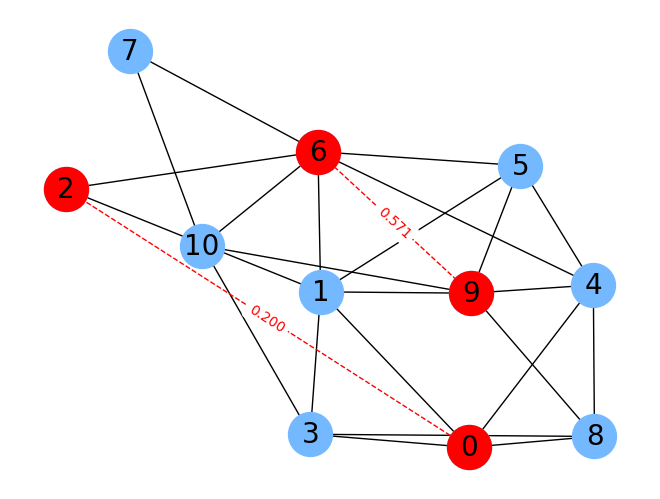

In [82]:
def _apply_prediction(G, func, ebunch=None):
    if ebunch is None:
        ebunch = nx.non_edges(G)
    else:
        for u, v in ebunch:
            if u not in G:
                raise nx.NodeNotFound(f"Node {u} not in G.")
            if v not in G:
                raise nx.NodeNotFound(f"Node {v} not in G.")
    return ((u, v, func(u, v)) for u, v in ebunch)

def jaccard_coefficient(G, ebunch=None):
    def predict(u, v):
        union_size = len(set(G[u]) | set(G[v]))
        if union_size == 0:
            return 0
        return len(nx.common_neighbors(G, u, v)) / union_size

    return _apply_prediction(G, predict, ebunch)

# Draw graph with coefficient edges
def draw_coefficient_edges(G, preds):
    edge_labels = {}
    target_list = []

    for u, v, p in preds:
        edge_labels[(u, v)] = f"{p:.3f}"
        target_list.append(u)
        target_list.append(v)
        
    pos = nx.spring_layout(G)

    nx.draw(G, pos, 
            node_size=1000,
            node_color='#74b9ff',
            with_labels=True,
            font_size = 20)
    # Mark target nodes as green color
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=target_list,
                           node_size=1000,
                           node_color='r')
    nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red'
    )

# Calculate Jaccard’s coefficient of node pairs in a list of nodes
node_list = [(6, 9), (0, 2)]
preds = nx.jaccard_coefficient(G, node_list)
draw_coefficient_edges(G, preds)

## 3.2/Katz Index

Largest eigenvalue: 1.6278814533249726


/home/osfa_cat/.local/lib/python3.10/site-packages/scipy/sparse/_base.py:719: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.13.0. Use `.toarray()` instead.
  warn(np.VisibleDeprecationWarning(


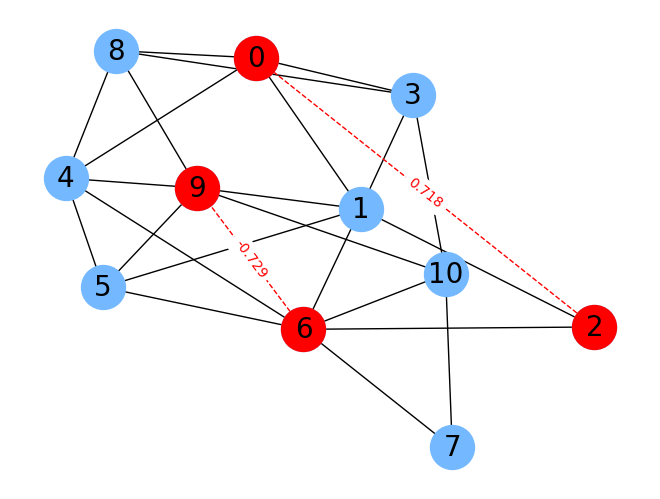

In [79]:
import networkx as nx
import numpy as np
from numpy.linalg import inv

#Calculate highest eigenvector
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
node_list = [(6, 9), (0, 2)]

print("Largest eigenvalue:", max(e))
beta = 1/max(e)
I = np.identity(len(G.nodes)) #create identity matrix

#Katz score
katz_matrix = np.linalg.inv(I - nx.to_numpy_array(G)*beta) - I

#Get Katz score for node pairs
katz_score = []
for node_pair in node_list:
    katz_score.append((node_pair[0], node_pair[1], katz_matrix[node_pair[0], node_pair[1]]))

# Draw graph with coefficient edges
draw_coefficient_edges(G, katz_score)




# **4/Graph Kernels: Shortest Path Kernel, Weisfeiler-Lehman Kernel**


## 4.1/ Shortest Path Kernel

### 4.1.1/ Without library (disadvantage: may not be efficient for large graphs)

[[16. 16.]
 [16. 16.]]


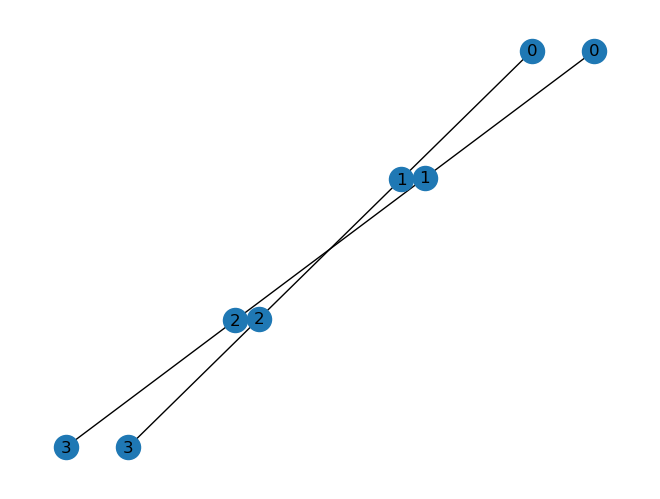

In [2]:
import networkx as nx
import numpy as np

# Define two simple graphs
G1 = nx.path_graph(4)
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c', 3:'d'}, 'label')
nx.draw(G1, with_labels=True)

G2 = nx.path_graph(4)
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b', 3:'c'}, 'label')
nx.draw(G2, with_labels=True)

# Compute all shortest paths in the graphs
paths_G1 = dict(nx.all_pairs_shortest_path_length(G1))
paths_G2 = dict(nx.all_pairs_shortest_path_length(G2))

# Initialize the kernel matrix
K = np.zeros((2, 2))

# Compute the shortest path kernel
for i, paths1 in enumerate([paths_G1, paths_G2]):
    for j, paths2 in enumerate([paths_G1, paths_G2]):
        # Count the number of common shortest paths
        common_paths = sum(len(set(paths1[n]).intersection(set(paths2[n]))) for n in range(4))
        K[i, j] = common_paths

print(K)

### 4.1.2/ With GraKeL library

[[1.         0.46291005]
 [0.46291005 1.        ]]


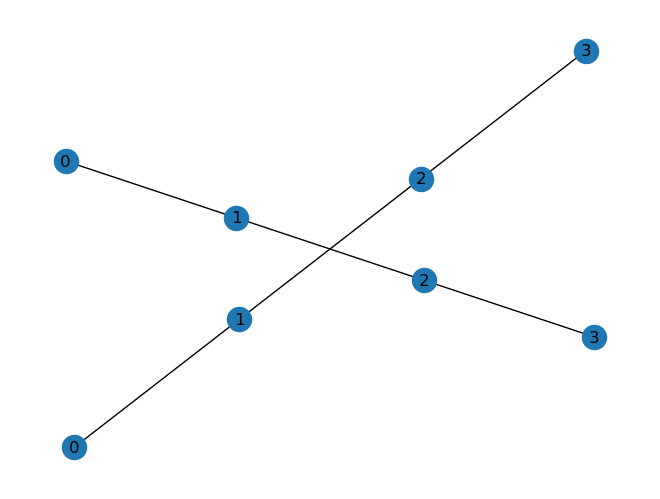

In [3]:
from grakel.utils import graph_from_networkx
from grakel import GraphKernel

# Define two simple graphs
G1 = nx.path_graph(4)
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c', 3:'d'}, 'label')
nx.draw(G1, with_labels=True)

G2 = nx.path_graph(4)
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b', 3:'c'}, 'label')
nx.draw(G2, with_labels=True)


nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

gk = GraphKernel(kernel=[{"name": "shortest_path"}], normalize=True)
K = gk.fit_transform(graphs)

print(K)

## 4.2/ Weisfeiler-Lehman Kernel

In [4]:
G1 = nx.Graph()
G1.add_edges_from(
    [
        (1, 2, {"label": "A"}),
        (2, 3, {"label": "A"}),
        (3, 1, {"label": "A"}),
        (1, 4, {"label": "B"}),
    ]
)
G1_node_attributes = {
    1: "A",
    2: "B",
    3: "C",
    4: "D",
}
# Set node labels by using node attributes
nx.set_node_attributes(G1, G1_node_attributes, name="label")

G2 = nx.Graph()
G2.add_edges_from(
    [
        (5, 6, {"label": "B"}),
        (6, 7, {"label": "A"}),
        (7, 5, {"label": "A"}),
        (7, 8, {"label": "A"}),
    ]
)
G2_node_attributes = {
    5: "E",
    6: "F",
    7: "G",
    8: "H",
}
# Set node labels by using node attributes
nx.set_node_attributes(G2, G2_node_attributes, name="label")


{1: 'A', 2: 'B', 3: 'C', 4: 'D'}


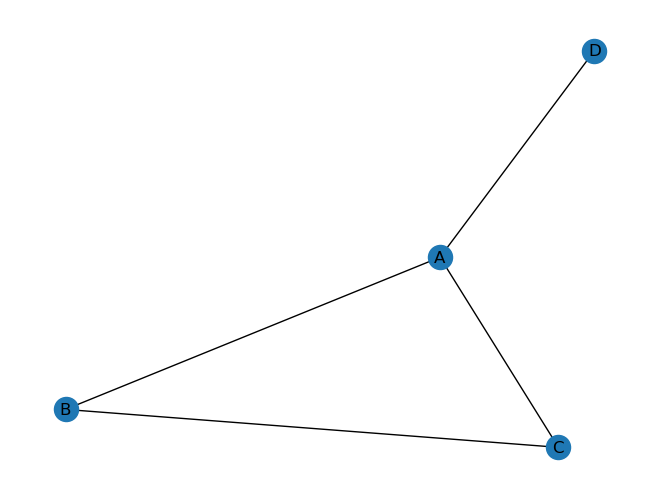

In [5]:
def draw_graph_with_labels(graph):
    labels = dict()
    names = nx.get_node_attributes(graph, 'label')
    print(names)
    for node in graph.nodes:
        labels[node] = f"{names[node]}"
    nx.draw(graph, labels=labels)
    

draw_graph_with_labels(G1)

{5: 'E', 6: 'F', 7: 'G', 8: 'H'}


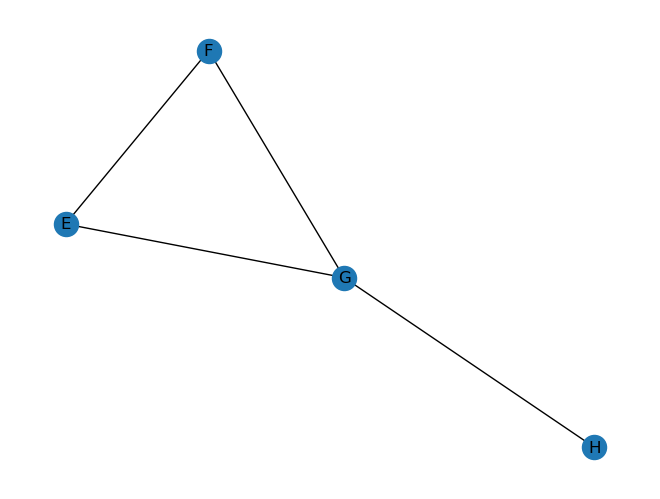

In [6]:
draw_graph_with_labels(G2)

# **5/node2vec: Scalable Feature Learning for Networks**

### Word2Vec

In [147]:
import numpy as np
import networkx as nx
import random
import threading
from collections import defaultdict

class Word2Vec:
    def __init__(self, vector_size=100, window=5, negative=5, alpha=0.025, min_count=1, sg=1, iter=5, num_threads=4):
        self.window = window
        self.negative = negative
        self.alpha = alpha
        self.min_count = min_count
        self.sg = sg
        self.iter = iter
        self.num_threads = num_threads
        self.vocab = defaultdict(int)
        self.index2word = []
        self.word2index = {}
        self.syn0 = None
        self.syn1neg = None
        self.table = None
        self.table_size = int(1e8)
        self.vector_size = vector_size
        self.size = vector_size
    
    def build_vocab(self, sentences):
        for sentence in sentences:
            for word in sentence:
                self.vocab[word] += 1
        self.vocab = {word: freq for word, freq in self.vocab.items() if freq >= self.min_count}
        self.index2word = list(self.vocab.keys())
        self.word2index = {word: idx for idx, word in enumerate(self.index2word)}
    
    def init_net(self):
        vocab_size = len(self.vocab)
        self.syn0 = (np.random.rand(vocab_size, self.size) - 0.5) / self.size
        self.syn1neg = np.zeros((vocab_size, self.size))
        self.init_unigram_table()
    
    def init_unigram_table(self):
        power = 0.75
        norm = sum([self.vocab[word] ** power for word in self.vocab])
        self.table = []
        for word in self.vocab:
            p = (self.vocab[word] ** power) / norm
            self.table += [self.word2index[word]] * int(p * self.table_size)
        self.table = np.array(self.table)
    
    def train_model_thread(self, sentences, alpha, thread_id):
        random.seed(thread_id)
        for iteration in range(self.iter):
            for sentence in sentences:
                sentence = [word for word in sentence if word in self.vocab]
                for pos, word in enumerate(sentence):
                    current_word_idx = self.word2index[word]
                    context_start = max(0, pos - self.window)
                    context_end = min(len(sentence), pos + self.window + 1)
                    context = [self.word2index[sentence[i]] for i in range(context_start, context_end) if i != pos]
                    self.train_pair(current_word_idx, context, alpha)
    
    def train_pair(self, word_idx, context_idxs, alpha):
        for context_idx in context_idxs:
            self.update(word_idx, context_idx, alpha)
    
    def update(self, word_idx, context_idx, alpha):
        # Negative sampling
        neg_samples = np.random.choice(self.table, size=self.negative)
        labels = np.array([1] + [-1] * self.negative)
        target_idxs = np.array([context_idx] + list(neg_samples))
        
        l2 = self.syn1neg[target_idxs]
        prod_term = np.dot(self.syn0[word_idx], l2.T)
        sigmoid = 1 / (1 + np.exp(-prod_term * labels))
        g = (sigmoid - 1) * labels * alpha
        
        self.syn0[word_idx] -= np.dot(g, l2)
        self.syn1neg[target_idxs] -= np.outer(g, self.syn0[word_idx])
    
    def train(self, sentences):
        self.build_vocab(sentences)
        self.init_net()
        alpha = self.alpha
        thread_data = []
        for thread_id in range(self.num_threads):
            start_idx = thread_id * len(sentences) // self.num_threads
            end_idx = (thread_id + 1) * len(sentences) // self.num_threads
            thread_data.append((sentences[start_idx:end_idx], alpha, thread_id))
        
        threads = [threading.Thread(target=self.train_model_thread, args=data) for data in thread_data]
        for t in threads:
            t.start()
        for t in threads:
            t.join()
    def get_embeddings(self):
        return {self.index2word[i]: self.syn0[i] for i in range(len(self.index2word))}

### Create Node2Vec

In [148]:
import numpy as np
import random
from collections import defaultdict
from tqdm import tqdm

class Node2Vec:
    def __init__(self, graph, dimensions=128, walk_length=80, num_walks=10, p=1, q=1, workers=1):
        """
        Initiates the Node2Vec object, precomputes walking probabilities and generates the walks.
        """
        self.graph = graph
        for i in range(len(self.graph)):
            self.graph[i, i] = 0
        self.dimensions = dimensions
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.p = p
        self.q = q
        self.workers = workers
        self.first_walk_probability = np.zeros(graph.shape)  # [current, destination]
        self.walk_probability = np.zeros((len(graph), len(graph), len(graph)))  # [last, current, destination]

        self._precompute_probabilities()
        self.walks = self._generate_walks()

    def _precompute_probabilities(self):
        """
        Precomputes transition probabilities for each node.
        """
        print(' Computing prob for first walk...')
        sum_weight = np.sum(self.graph, axis=1)
        sum_weight = np.where(sum_weight == 0, 1, sum_weight)
        normalized_weight = self.graph / np.tile(sum_weight, (len(self.graph), 1)).T
        self.first_walk_probability = normalized_weight

        print(' Computing prob for second walk...')
        for last in range(len(self.graph)):
            for current in range(len(self.graph)):
                if self.graph[last, current] == 0:
                    continue
                unbiased_unnormalized_weight = self.graph[current, :]
                for destination in range(len(self.graph)):
                    if destination == last:
                        unbiased_unnormalized_weight[last] = unbiased_unnormalized_weight[last] / self.p
                    elif self.graph[last, destination] == 0:
                        unbiased_unnormalized_weight[last] = unbiased_unnormalized_weight[last] / self.q
                biased_normalized_weight = unbiased_unnormalized_weight / np.sum(unbiased_unnormalized_weight)
                self.walk_probability[last, current, :] = biased_normalized_weight

    def _generate_walks(self):
        """
        Generates the random walks which will be used as the skip-gram input.
        :return: List of walks. Each walk is a list of nodes.
        """
        all_walks = []
        for n_walk in range(self.num_walks):
            n_th_walks = []
            for source in range(len(self.graph)):
                walk = [source]
                if np.sum(self.first_walk_probability[source, :]) != 0:
                    first_dest = np.random.choice(np.arange(len(self.graph)), 1, p=self.first_walk_probability[source, :])[0]
                    walk.append(first_dest)
                else:
                    walk = [str(source)]
                    n_th_walks.append(walk)
                    continue

                while len(walk) < self.walk_length:
                    if np.sum(self.walk_probability[walk[-2], walk[-1], :]) != 0:
                        dest = np.random.choice(np.arange(len(self.graph)), 1, p=self.walk_probability[walk[-2], walk[-1], :])[0]
                        walk.append(dest)
                    else:
                        break
                walk = [str(elm) for elm in walk]
                n_th_walks.append(walk)

            random.shuffle(n_th_walks)
            all_walks += n_th_walks
        return all_walks

    def fit(self, initial_wv_file=None, save_wv_file=None, **skip_gram_params):
        """
        Creates the embeddings using the provided Word2Vec class.
        """
        print('Training skip-gram model...')
        model = Word2Vec(vector_size=self.dimensions, **skip_gram_params)
        model.train(self.walks)

        if save_wv_file:
            with open(save_wv_file, 'w') as f:
                for word, vector in model.get_embeddings().items():
                    f.write(f"{word} {' '.join(map(str, vector))}\n")

        return model

### Run Node2Vec to generate embeddings and visualize

 Computing prob for first walk...
 Computing prob for second walk...
Training skip-gram model...


/tmp/ipykernel_2137539/1990620044.py:73: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-prod_term * labels))


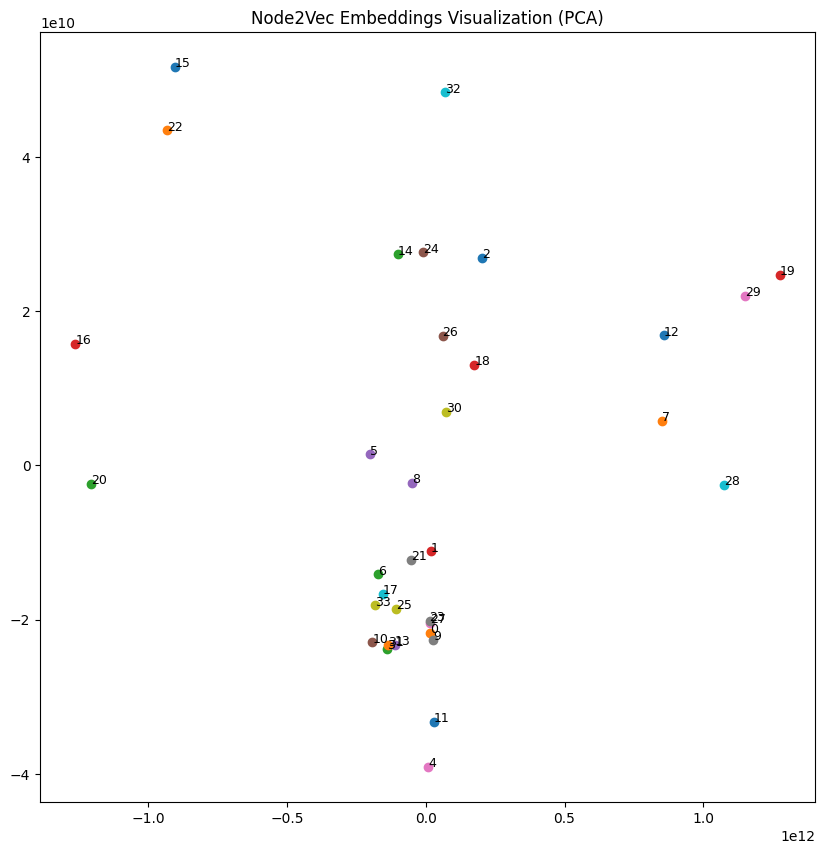

In [149]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import networkx as nx

# Generate the Karate Club graph
G = nx.karate_club_graph()
adj_matrix = nx.to_numpy_array(G)

# Create the Node2Vec model
node2vec = Node2Vec(graph=adj_matrix, dimensions=2, walk_length=10, num_walks=100, workers=4, p=1, q=1)

# Train the model
model = node2vec.fit()

# Get the embeddings
embeddings = model.get_embeddings()

# Visualize the embeddings using PCA
def plot_embeddings(embeddings):
    nodes = list(embeddings.keys())
    vectors = np.array([embeddings[node] for node in nodes])

    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 10))
    for i, node in enumerate(nodes):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], str(node), fontsize=9)
    plt.title("Node2Vec Embeddings Visualization (PCA)")
    plt.show()

plot_embeddings(embeddings)


# **6/Don't Walk, Skip! Online Learning of Multi-scale Network Embeddings (Walklets)**

### Utils for data reading and writing

In [176]:
import argparse
import pandas as pd
import networkx as nx

def parameter_parser():
    """
    A method to parse up command line parameters.
    By default it gives an embedding of the Facebook food dataset.
    The default hyperparameters give a good quality representation without grid search.
    Representations are sorted by ID.
    """
    parser = argparse.ArgumentParser(description="Run Walklet.")

    parser.add_argument("--input",
                        nargs="?",
                        default="./input/abc.csv",
	                help="Input folder with jsons.")

    parser.add_argument("--output",
                        nargs="?",
                        default="./output/abc_embedding.csv",
	                help="Embeddings path.")

    parser.add_argument("--walk-type",
                        nargs="?",
                        default="second",
	                help="Random walk order.")

    parser.add_argument("--dimensions",
                        type=int,
                        default=16,
	                help="Number of dimensions. Default is 16.")

    parser.add_argument("--walk-number",
                        type=int,
                        default=5,
	                help="Number of walks. Default is 5.")

    parser.add_argument("--walk-length",
                        type=int,
                        default=80,
	                help="Walk length. Default is 80.")

    parser.add_argument("--window-size",
                        type=int,
                        default=5,
	                help="Number of embeddings. Default is 5.")

    parser.add_argument("--workers",
                        type=int,
                        default=4,
	                help="Number of cores. Default is 4.")

    parser.add_argument("--min-count",
                        type=int,
                        default=1,
	                help="Minimal appearance feature count. Default is 1.")

    parser.add_argument("--P",
                        type=float,
                        default=1.0,
	                help="Return hyperparameter. Default is 1.0.")

    parser.add_argument("--Q",
                        type=float,
                        default=1.0,
	                help="Inout hyperparameter. Default is 1.0.")

    return parser.parse_args()

def create_graph(file_name):
    """
    Reading an adjacency list file and returning an Nx graph object.
    :param file_name: location of the adjacency list file.
    :return graph: Networkx graph object.
    """
    graph = nx.read_adjlist(file_name)
    return graph


def walk_transformer(walk, length):
    """
    Tranforming a given random walk to have skips.
    :param walk: Random walk as a list.
    :param length: Skip size.
    :return transformed_walk: Walk chunks for training.
    """
    transformed_walk = []
    for step in range(length+1):
        neighbors = [y for i, y in enumerate(walk[step:]) if i % length == 0]
        transformed_walk.append(neighbors)
    return transformed_walk

#### Walker classes

In [177]:
import random
import numpy as np
import networkx as nx
from tqdm import tqdm

class FirstOrderRandomWalker:
    """
    Class to do fast first-order random walks.
    """
    def __init__(self, graph, args):
        """
        Constructor for FirstOrderRandomWalker.
        :param graph: Nx graph object.
        :param args: Arguments object.
        """
        self.graph = graph
        self.walk_length = args.walk_length
        self.walk_number = args.walk_number
        self.walks = []

    def do_walk(self, node):
        """
        Doing a single truncated random walk from a source node.
        :param node: Source node of the truncated random walk.
        :return walk: A single random walk.
        """
        walk = [node]
        for _ in range(self.walk_length-1):
            nebs = [node for node in self.graph.neighbors(walk[-1])]
            if len(nebs) > 0:
                walk = walk + random.sample(nebs, 1)
        walk = [str(w) for w in walk]
        return walk

    def do_walks(self):
        """
        Doing a fixed number of truncated random walk from every node in the graph.
        """
        print("\nModel initialized.\nRandom walks started.")
        for iteration in range(self.walk_number):
            print("\nRandom walk round: "+str(iteration+1)+"/"+str(self.walk_number)+".\n")
            for node in tqdm(self.graph.nodes()):
                walk_from_node = self.do_walk(node)
                self.walks.append(walk_from_node)
        return self.walks

class SecondOrderRandomWalker:
    """
    Class to do second-order random walks.
    """
    def __init__(self, nx_G, is_directed, args):
        """
        Constructor for SecondOrderRandomWalker.
        :param  nx_G: Nx graph object.
        :param is_directed: Directed nature of the graph -- True/False.
        :param args: Arguments object.
        """
        self.G = nx_G
        self.nodes = nx.nodes(self.G)
        print("Edge weighting.\n")
        for edge in tqdm(self.G.edges()):
            self.G[edge[0]][edge[1]]['weight'] = 1.0
            self.G[edge[1]][edge[0]]['weight'] = 1.0
        self.is_directed = is_directed
        self.walk_length = args.walk_length
        self.walk_number = args.walk_number
        self.p = args.P
        self.q = args.Q

    def node2vec_walk(self, start_node):
        """
        Simulate a random walk starting from start node.
        """
        G = self.G
        alias_nodes = self.alias_nodes
        alias_edges = self.alias_edges

        walk = [start_node]

        while len(walk) < self.walk_length:
            cur = walk[-1]
            cur_n = sorted(G.neighbors(cur))
            if len(cur_n) > 0:
                if len(walk) == 1:
                    walk.append(cur_n[alias_draw(alias_nodes[cur][0], alias_nodes[cur][1])])
                else:
                    pre = walk[-2]
                    next = cur_n[alias_draw(alias_edges[(pre, cur)][0], alias_edges[(pre, cur)][1])]
                    walk.append(next)
            else:
                break
        walk = [str(w) for w in walk]
        return walk

    def do_walks(self):
        """
        Repeatedly simulate random walks from each node.
        """
        G = self.G
        walks = []
        nodes = list(G.nodes())
        for walk_it in range(self.walk_number):
            print("\nRandom walk round: "+str(walk_it+1)+"/"+str(self.walk_number)+".\n")
            random.shuffle(nodes)
            for node in tqdm(nodes):
                walks.append(self.node2vec_walk(start_node=node))

        return walks

    def get_alias_edge(self, src, dst):
        """
        Get the alias edge setup lists for a given edge.
        """
        G = self.G
        p = self.p
        q = self.q

        unnormalized_probs = []
        for dst_nbr in sorted(G.neighbors(dst)):
            if dst_nbr == src:
                unnormalized_probs.append(G[dst][dst_nbr]['weight']/p)
            elif G.has_edge(dst_nbr, src):
                unnormalized_probs.append(G[dst][dst_nbr]['weight'])
            else:
                unnormalized_probs.append(G[dst][dst_nbr]['weight']/q)
        norm_const = sum(unnormalized_probs)
        normalized_probs = [float(u_prob)/norm_const for u_prob in unnormalized_probs]

        return alias_setup(normalized_probs)

    def preprocess_transition_probs(self):
        """
        Preprocessing of transition probabilities for guiding the random walks.
        """
        G = self.G
        is_directed = self.is_directed

        alias_nodes = {}
        print("")
        print("Preprocesing.\n")
        for node in tqdm(G.nodes()):
            unnormalized_probs = [G[node][nbr]['weight'] for nbr in sorted(G.neighbors(node))]
            norm_const = sum(unnormalized_probs)
            normalized_probs = [float(u_prob)/norm_const for u_prob in unnormalized_probs]
            alias_nodes[node] = alias_setup(normalized_probs)

        alias_edges = {}

        if is_directed:
            for edge in G.edges():
                alias_edges[edge] = self.get_alias_edge(edge[0], edge[1])
        else:
            for edge in tqdm(G.edges()):
                alias_edges[edge] = self.get_alias_edge(edge[0], edge[1])
                alias_edges[(edge[1], edge[0])] = self.get_alias_edge(edge[1], edge[0])

        self.alias_nodes = alias_nodes
        self.alias_edges = alias_edges

        return

def alias_setup(probs):
    """
    Compute utility lists for non-uniform sampling from discrete distributions.
    """
    K = len(probs)
    q = np.zeros(K)
    J = np.zeros(K, dtype=np.int)
    smaller = []
    larger = []

    for kk, prob in enumerate(probs):
        q[kk] = K*prob
        if q[kk] < 1.0:
            smaller.append(kk)
        else:
            larger.append(kk)

    while len(smaller) > 0 and len(larger) > 0:
        small = smaller.pop()
        large = larger.pop()

        J[small] = large
        q[large] = q[large] + q[small] - 1.0
        if q[large] < 1.0:
            smaller.append(large)
        else:
            larger.append(large)

    return J, q

def alias_draw(J, q):
    """
    Draw sample from a non-uniform discrete distribution using alias sampling.
    """
    K = len(J)

    kk = int(np.floor(np.random.rand()*K))
    if np.random.rand() < q[kk]:
        return kk
    else:
        return J[kk]


### Word2Vec

In [178]:
import numpy as np
import networkx as nx
import random
import threading
from collections import defaultdict

class Word2Vec:
    def __init__(self, vector_size=100, window=5, negative=5, alpha=0.025, min_count=1, sg=1, iter=5, num_threads=4):
        self.window = window
        self.negative = negative
        self.alpha = alpha
        self.min_count = min_count
        self.sg = sg
        self.iter = iter
        self.num_threads = num_threads
        self.vocab = defaultdict(int)
        self.index2word = []
        self.word2index = {}
        self.syn0 = None
        self.syn1neg = None
        self.table = None
        self.table_size = int(1e8)
        self.vector_size = vector_size
        self.size = vector_size
    
    def build_vocab(self, sentences):
        for sentence in sentences:
            for word in sentence:
                self.vocab[word] += 1
        self.vocab = {word: freq for word, freq in self.vocab.items() if freq >= self.min_count}
        self.index2word = list(self.vocab.keys())
        self.word2index = {word: idx for idx, word in enumerate(self.index2word)}
    
    def init_net(self):
        vocab_size = len(self.vocab)
        self.syn0 = (np.random.rand(vocab_size, self.size) - 0.5) / self.size
        self.syn1neg = np.zeros((vocab_size, self.size))
        self.init_unigram_table()
    
    def init_unigram_table(self):
        power = 0.75
        norm = sum([self.vocab[word] ** power for word in self.vocab])
        self.table = []
        for word in self.vocab:
            p = (self.vocab[word] ** power) / norm
            self.table += [self.word2index[word]] * int(p * self.table_size)
        self.table = np.array(self.table)
    
    def train_model_thread(self, sentences, alpha, thread_id):
        random.seed(thread_id)
        for iteration in range(self.iter):
            for sentence in sentences:
                sentence = [word for word in sentence if word in self.vocab]
                for pos, word in enumerate(sentence):
                    current_word_idx = self.word2index[word]
                    context_start = max(0, pos - self.window)
                    context_end = min(len(sentence), pos + self.window + 1)
                    context = [self.word2index[sentence[i]] for i in range(context_start, context_end) if i != pos]
                    self.train_pair(current_word_idx, context, alpha)
    
    def train_pair(self, word_idx, context_idxs, alpha):
        for context_idx in context_idxs:
            self.update(word_idx, context_idx, alpha)
    
    def update(self, word_idx, context_idx, alpha):
        # Negative sampling
        neg_samples = np.random.choice(self.table, size=self.negative)
        labels = np.array([1] + [-1] * self.negative)
        target_idxs = np.array([context_idx] + list(neg_samples))
        
        l2 = self.syn1neg[target_idxs]
        prod_term = np.dot(self.syn0[word_idx], l2.T)
        sigmoid = 1 / (1 + np.exp(-prod_term * labels))
        g = (sigmoid - 1) * labels * alpha
        
        self.syn0[word_idx] -= np.dot(g, l2)
        self.syn1neg[target_idxs] -= np.outer(g, self.syn0[word_idx])
    
    def train(self, sentences):
        self.build_vocab(sentences)
        self.init_net()
        alpha = self.alpha
        thread_data = []
        for thread_id in range(self.num_threads):
            start_idx = thread_id * len(sentences) // self.num_threads
            end_idx = (thread_id + 1) * len(sentences) // self.num_threads
            thread_data.append((sentences[start_idx:end_idx], alpha, thread_id))
        
        threads = [threading.Thread(target=self.train_model_thread, args=data) for data in thread_data]
        for t in threads:
            t.start()
        for t in threads:
            t.join()

### Walklet

In [182]:
import numpy as np
import pandas as pd

class WalkletMachine:
    """
    Walklet multi-scale graph factorization machine class.
    The graph is being parsed up, random walks are initiated.
    Embeddings are fitted, concatenated and the multi-scale embedding is dumped to disk.
    """
    def __init__(self, args):
        """
        Walklet machine constructor.
        :param args: Arguments object with the model hyperparameters.
        """
        self.args = args
        self.graph = create_graph(self.args.input)
        if self.args.walk_type == "first":
            self.walker = FirstOrderRandomWalker(self.graph, args)
        else:
            self.walker = SecondOrderRandomWalker(self.graph, False, args)
            self.walker.preprocess_transition_probs()
        self.walks = self.walker.do_walks()
        del self.walker
        self.create_embedding()
        self.save_model()

    def walk_extracts(self, length):
        """
        Extracted walks with skip equal to the length.
        :param length: Length of the skip to be used.
        :return good_walks: The attenuated random walks.
        """
        good_walks = [walk_transformer(walk, length) for walk in self.walks]
        good_walks = [w for walks in good_walks for w in walks]
        return good_walks

    def get_embedding(self, model):
        """
        Extracting the embedding according to node order from the embedding model.
        :param model: A Word2Vec model after model fitting.
        :return embedding: A numpy array with the embedding sorted by node IDs.
        """
        embedding = []
        for node in range(len(self.graph.nodes())):
            embedding.append(list(model.syn0[model.word2index[str(node)]]))
        embedding = np.array(embedding)
        return embedding


    def create_embedding(self):
        """
        Creating a multi-scale embedding.
        """
        self.embedding = []
        for index in range(1, self.args.window_size + 1):
            print("\nOptimization round: " + str(index) + "/" + str(self.args.window_size) + ".")
            print("Creating documents.")
            clean_documents = self.walk_extracts(index)
            print("Fitting model.")

            model = Word2Vec(vector_size=self.args.dimensions,
                              window=1,
                              min_count=self.args.min_count,
                              sg=1,
                              iter=self.args.iter,
                              num_threads=self.args.workers)

            model.build_vocab(clean_documents)
            model.init_net()
            model.train(clean_documents)

            new_embedding = self.get_embedding(model)
            self.embedding = self.embedding + [new_embedding]
        self.embedding = np.concatenate(self.embedding, axis=1)


    def save_model(self):
        """
        Saving the embedding as a csv with sorted IDs.
        """
        print("\nModels are integrated to be multi scale.\nSaving to disk.")
        self.column_names = ["x_" + str(x) for x in range(self.embedding.shape[1])]
        self.embedding = pd.DataFrame(self.embedding, columns=self.column_names)
        self.embedding.to_csv(self.args.output, index=None)

### Create Arguments Object

In [183]:
class Args:
    def __init__(self, input_graph, output, dimensions, window_size, walk_type, min_count, workers, walk_length, walk_number, iter):
        self.input = input_graph
        self.output = output
        self.dimensions = dimensions
        self.window_size = window_size
        self.walk_type = walk_type
        self.min_count = min_count
        self.workers = workers
        self.walk_length = walk_length  
        self.walk_number = walk_number
        self.iter = iter

### Initialize and Run WalkletMachine then Visualize the Embeddings


Model initialized.
Random walks started.

Random walk round: 1/80.



100%|██████████| 34/34 [00:00<00:00, 94944.30it/s]



Random walk round: 2/80.



100%|██████████| 34/34 [00:00<00:00, 105869.59it/s]



Random walk round: 3/80.



100%|██████████| 34/34 [00:00<00:00, 77799.42it/s]



Random walk round: 4/80.



100%|██████████| 34/34 [00:00<00:00, 92541.43it/s]



Random walk round: 5/80.



100%|██████████| 34/34 [00:00<00:00, 98349.20it/s]



Random walk round: 6/80.



100%|██████████| 34/34 [00:00<00:00, 102742.32it/s]



Random walk round: 7/80.



100%|██████████| 34/34 [00:00<00:00, 101934.48it/s]



Random walk round: 8/80.



100%|██████████| 34/34 [00:00<00:00, 97475.28it/s]



Random walk round: 9/80.



100%|██████████| 34/34 [00:00<00:00, 101571.46it/s]



Random walk round: 10/80.



100%|██████████| 34/34 [00:00<00:00, 106105.90it/s]



Random walk round: 11/80.



100%|██████████| 34/34 [00:00<00:00, 102964.86it/s]



Random walk round: 12/80.



100%|██████████| 34/34 [00:00<00:00, 103940.48it/s]



Random walk round: 13/80.



100%|██████████| 34/34 [00:00<00:00, 90257.17it/s]



Random walk round: 14/80.



100%|██████████| 34/34 [00:00<00:00, 8636.00it/s]



Random walk round: 15/80.



100%|██████████| 34/34 [00:00<00:00, 51076.77it/s]



Random walk round: 16/80.



100%|██████████| 34/34 [00:00<00:00, 52856.31it/s]



Random walk round: 17/80.



100%|██████████| 34/34 [00:00<00:00, 53712.37it/s]



Random walk round: 18/80.



100%|██████████| 34/34 [00:00<00:00, 54181.74it/s]



Random walk round: 19/80.



100%|██████████| 34/34 [00:00<00:00, 54722.31it/s]



Random walk round: 20/80.



100%|██████████| 34/34 [00:00<00:00, 17001.23it/s]



Random walk round: 21/80.



100%|██████████| 34/34 [00:00<00:00, 53712.37it/s]



Random walk round: 22/80.



100%|██████████| 34/34 [00:00<00:00, 54181.74it/s]



Random walk round: 23/80.



100%|██████████| 34/34 [00:00<00:00, 54722.31it/s]



Random walk round: 24/80.



100%|██████████| 34/34 [00:00<00:00, 55880.23it/s]



Random walk round: 25/80.



100%|██████████| 34/34 [00:00<00:00, 54722.31it/s]



Random walk round: 26/80.



100%|██████████| 34/34 [00:00<00:00, 55124.21it/s]



Random walk round: 27/80.



100%|██████████| 34/34 [00:00<00:00, 55145.53it/s]



Random walk round: 28/80.



100%|██████████| 34/34 [00:00<00:00, 49140.71it/s]



Random walk round: 29/80.



100%|██████████| 34/34 [00:00<00:00, 44943.69it/s]



Random walk round: 30/80.



100%|██████████| 34/34 [00:00<00:00, 11559.24it/s]



Random walk round: 31/80.



100%|██████████| 34/34 [00:00<00:00, 54161.16it/s]



Random walk round: 32/80.



100%|██████████| 34/34 [00:00<00:00, 104473.51it/s]



Random walk round: 33/80.



100%|██████████| 34/34 [00:00<00:00, 98894.82it/s]



Random walk round: 34/80.



100%|██████████| 34/34 [00:00<00:00, 103638.33it/s]



Random walk round: 35/80.



100%|██████████| 34/34 [00:00<00:00, 47236.28it/s]



Random walk round: 36/80.



100%|██████████| 34/34 [00:00<00:00, 50785.73it/s]



Random walk round: 37/80.



100%|██████████| 34/34 [00:00<00:00, 15917.66it/s]



Random walk round: 38/80.



100%|██████████| 34/34 [00:00<00:00, 48621.32it/s]



Random walk round: 39/80.



100%|██████████| 34/34 [00:00<00:00, 52836.73it/s]



Random walk round: 40/80.



100%|██████████| 34/34 [00:00<00:00, 52506.01it/s]



Random walk round: 41/80.



100%|██████████| 34/34 [00:00<00:00, 25235.59it/s]



Random walk round: 42/80.



100%|██████████| 34/34 [00:00<00:00, 33808.99it/s]



Random walk round: 43/80.



100%|██████████| 34/34 [00:00<00:00, 102668.35it/s]



Random walk round: 44/80.



100%|██████████| 34/34 [00:00<00:00, 103113.76it/s]



Random walk round: 45/80.



100%|██████████| 34/34 [00:00<00:00, 103713.70it/s]



Random walk round: 46/80.



100%|██████████| 34/34 [00:00<00:00, 103563.06it/s]



Random walk round: 47/80.



100%|██████████| 34/34 [00:00<00:00, 103864.77it/s]



Random walk round: 48/80.



100%|██████████| 34/34 [00:00<00:00, 99864.38it/s]



Random walk round: 49/80.



100%|██████████| 34/34 [00:00<00:00, 102742.32it/s]



Random walk round: 50/80.



100%|██████████| 34/34 [00:00<00:00, 103864.77it/s]



Random walk round: 51/80.



100%|██████████| 34/34 [00:00<00:00, 99032.18it/s]



Random walk round: 52/80.



100%|██████████| 34/34 [00:00<00:00, 101139.25it/s]



Random walk round: 53/80.



100%|██████████| 34/34 [00:00<00:00, 98963.45it/s]



Random walk round: 54/80.



100%|██████████| 34/34 [00:00<00:00, 103864.77it/s]



Random walk round: 55/80.



100%|██████████| 34/34 [00:00<00:00, 103337.92it/s]



Random walk round: 56/80.



100%|██████████| 34/34 [00:00<00:00, 106981.50it/s]



Random walk round: 57/80.



100%|██████████| 34/34 [00:00<00:00, 105712.63it/s]



Random walk round: 58/80.



100%|██████████| 34/34 [00:00<00:00, 108117.01it/s]



Random walk round: 59/80.



100%|██████████| 34/34 [00:00<00:00, 108281.20it/s]



Random walk round: 60/80.



100%|██████████| 34/34 [00:00<00:00, 104857.60it/s]



Random walk round: 61/80.



100%|██████████| 34/34 [00:00<00:00, 106741.27it/s]



Random walk round: 62/80.



100%|██████████| 34/34 [00:00<00:00, 105089.41it/s]



Random walk round: 63/80.



100%|██████████| 34/34 [00:00<00:00, 102594.49it/s]



Random walk round: 64/80.



100%|██████████| 34/34 [00:00<00:00, 105948.24it/s]



Random walk round: 65/80.



100%|██████████| 34/34 [00:00<00:00, 12449.27it/s]



Random walk round: 66/80.



100%|██████████| 34/34 [00:00<00:00, 102300.10it/s]



Random walk round: 67/80.



100%|██████████| 34/34 [00:00<00:00, 103039.26it/s]



Random walk round: 68/80.



100%|██████████| 34/34 [00:00<00:00, 102964.86it/s]



Random walk round: 69/80.



100%|██████████| 34/34 [00:00<00:00, 98146.14it/s]



Random walk round: 70/80.



100%|██████████| 34/34 [00:00<00:00, 103940.48it/s]



Random walk round: 71/80.



100%|██████████| 34/34 [00:00<00:00, 102080.41it/s]



Random walk round: 72/80.



100%|██████████| 34/34 [00:00<00:00, 98281.42it/s]



Random walk round: 73/80.



100%|██████████| 34/34 [00:00<00:00, 96747.85it/s]



Random walk round: 74/80.



100%|██████████| 34/34 [00:00<00:00, 99032.18it/s]



Random walk round: 75/80.



100%|██████████| 34/34 [00:00<00:00, 107061.81it/s]



Random walk round: 76/80.



100%|██████████| 34/34 [00:00<00:00, 100853.14it/s]



Random walk round: 77/80.



100%|██████████| 34/34 [00:00<00:00, 97675.57it/s]



Random walk round: 78/80.



100%|██████████| 34/34 [00:00<00:00, 26511.68it/s]



Random walk round: 79/80.



100%|██████████| 34/34 [00:00<00:00, 38283.58it/s]



Random walk round: 80/80.



100%|██████████| 34/34 [00:00<00:00, 103412.86it/s]


Optimization round: 1/5.
Creating documents.
Fitting model.



/tmp/ipykernel_2137539/4182760400.py:73: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-prod_term * labels))



Optimization round: 2/5.
Creating documents.
Fitting model.

Optimization round: 3/5.
Creating documents.
Fitting model.

Optimization round: 4/5.
Creating documents.
Fitting model.

Optimization round: 5/5.
Creating documents.
Fitting model.

Models are integrated to be multi scale.
Saving to disk.


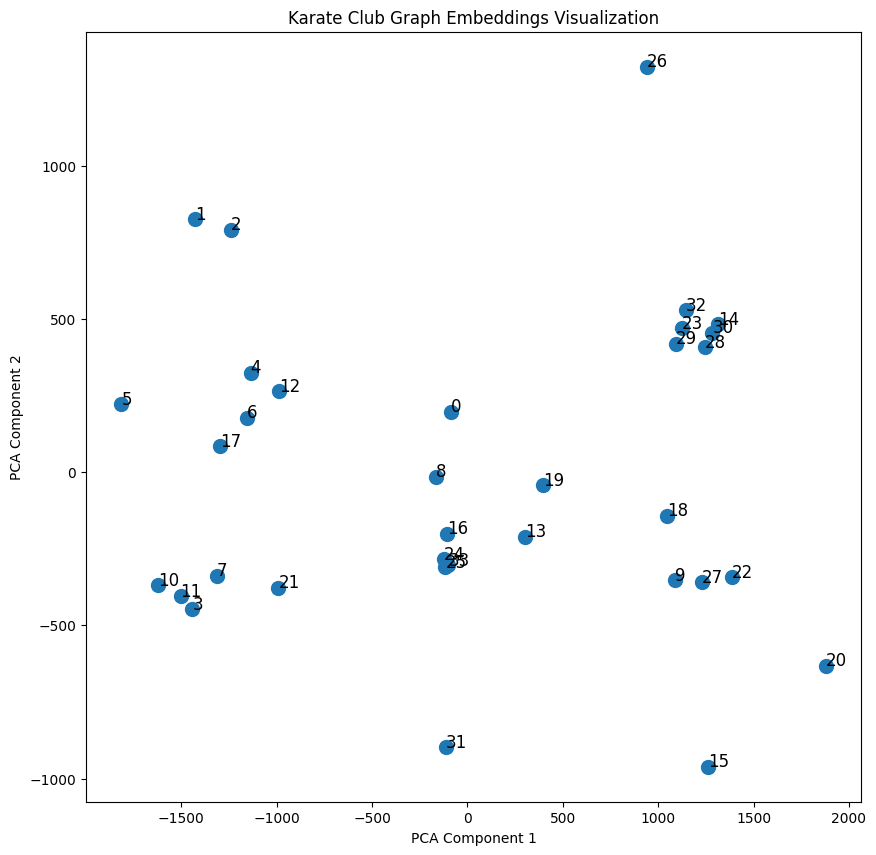

In [184]:
# Create a graph using the karate club dataset
karate_club_graph = nx.karate_club_graph()

# Save the graph in adjacency list format
nx.write_adjlist(karate_club_graph, "karate_club.adjlist")

# Define the arguments for the WalkletMachine
args = Args(input_graph="karate_club.adjlist",
            output="karate_club_embedding.csv",
            dimensions=128,
            window_size=5,
            walk_type="first",
            min_count=1,
            workers=4,
            walk_length=10,   # Set the walk length
            walk_number=80,   # Set the number of walks
            iter=5)           # Set the number of iterations for training

# Instantiate and run the WalkletMachine
walklet_machine = WalkletMachine(args)

# Load the embeddings from the saved CSV
embeddings = pd.read_csv("karate_club_embedding.csv")

# Use PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=100)

# Annotate points with their node IDs
for i, txt in enumerate(karate_club_graph.nodes()):
    plt.annotate(txt, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=12)

plt.title("Karate Club Graph Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# **6/LINE: Large-scale Information Network Embedding**


## Alias Method for Sampling

In [104]:
import numpy as np
# Create alias table from given probability distribution
def create_alias_table(area_ratio):
    """

    :param area_ratio: sum(area_ratio)=1
    :return: accept,alias
    """
    l = len(area_ratio)
    accept, alias = [0] * l, [0] * l
    small, large = [], []
    area_ratio_ = np.array(area_ratio) * l
    for i, prob in enumerate(area_ratio_):
        if prob < 1.0:
            small.append(i)
        else:
            large.append(i)

    while small and large:
        small_idx, large_idx = small.pop(), large.pop()
        accept[small_idx] = area_ratio_[small_idx]
        alias[small_idx] = large_idx
        area_ratio_[large_idx] = area_ratio_[large_idx] - \
                                 (1 - area_ratio_[small_idx])
        if area_ratio_[large_idx] < 1.0:
            small.append(large_idx)
        else:
            large.append(large_idx)

    while large:
        large_idx = large.pop()
        accept[large_idx] = 1
    while small:
        small_idx = small.pop()
        accept[small_idx] = 1

    return accept, alias

# Alias sampling
def alias_sample(accept, alias):
    """

    :param accept:
    :param alias:
    :return: sample index
    """
    N = len(accept)
    i = int(np.random.random() * N)
    r = np.random.random()
    if r < accept[i]:
        return i
    else:
        return alias[i]

## Preprocess a graph

In [105]:
def preprocess_nxgraph(graph):
    node2idx = {}
    idx2node = []
    node_size = 0
    for node in graph.nodes():
        node2idx[node] = node_size
        idx2node.append(node)
        node_size += 1
    return idx2node, node2idx

## Create model: set up embeddings and define the model used for training

In [106]:
import math
import random

'''
create_model(numNodes, embedding_size, order='second')
This function initializes the embeddings and defines the model.

Input:

numNodes: The number of nodes in the graph.
embedding_size: The size of the embedding vectors.
order: The order of proximity to be used ('first' or 'second').
Output:

model: A function that computes the dot product of embeddings for given node pairs.
embeddings: A dictionary containing the initialized embeddings.
'''

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Calculate the logistic loss between true value and predicted value
def line_loss(y_true, y_pred):
    return -np.mean(np.log(sigmoid(y_true * y_pred)))


def reduce_sum(x, axis=None, keepdims=False):
    return np.sum(x, axis=axis, keepdims=keepdims)


def create_model(numNodes, embedding_size, order='second'):
    embeddings = {
        'first': np.random.rand(numNodes, embedding_size),
        'second': np.random.rand(numNodes, embedding_size),
        'context': np.random.rand(numNodes, embedding_size)
    }

    def model(v_i, v_j):
        v_i_emb = embeddings['first'][v_i]
        v_j_emb = embeddings['first'][v_j]
        v_i_emb_second = embeddings['second'][v_i]
        v_j_context_emb = embeddings['context'][v_j]

        first_order = reduce_sum(v_i_emb * v_j_emb, axis=-1)
        second_order = reduce_sum(v_i_emb_second * v_j_context_emb, axis=-1)

        if order == 'first':
            return first_order
        elif order == 'second':
            return second_order
        else:
            return first_order, second_order

    return model, embeddings

## Create LINE

In [107]:
class LINE:
    def __init__(self, graph, embedding_size=8, negative_ratio=5, order='second'):
        """
        :param graph:
        :param embedding_size:
        :param negative_ratio:
        :param order: 'first', 'second', 'all'
        """
        if order not in ['first', 'second', 'all']:
            raise ValueError('mode must be first, second, or all')

        self.graph = graph
        self.idx2node, self.node2idx = self.preprocess_nxgraph(graph)
        self.use_alias = True

        self.rep_size = embedding_size
        self.order = order

        self._embeddings = {}
        self.negative_ratio = negative_ratio
        self.order = order

        self.node_size = graph.number_of_nodes()
        self.edge_size = graph.number_of_edges()
        self.samples_per_epoch = self.edge_size * (1 + negative_ratio)

        self._gen_sampling_table()
        self.reset_model()

    def preprocess_nxgraph(self, graph):
        idx2node = list(graph.nodes())
        node2idx = {node: idx for idx, node in enumerate(idx2node)}
        return idx2node, node2idx

    def reset_training_config(self, batch_size, times):
        self.batch_size = batch_size
        self.steps_per_epoch = ((self.samples_per_epoch - 1) // self.batch_size + 1) * times

    def reset_model(self, opt='adam'):
        self.model, self.embeddings = create_model(self.node_size, self.rep_size, self.order)
        self.batch_it = self.batch_iter(self.node2idx)

    def _gen_sampling_table(self):
        # create sampling table for vertex
        power = 0.75
        numNodes = self.node_size
        node_degree = np.zeros(numNodes)  # out degree
        node2idx = self.node2idx

        for edge in self.graph.edges():
            node_degree[node2idx[edge[0]]] += self.graph[edge[0]][edge[1]].get('weight', 1.0)

        total_sum = sum([math.pow(node_degree[i], power) for i in range(numNodes)])
        norm_prob = [float(math.pow(node_degree[j], power)) / total_sum for j in range(numNodes)]

        self.node_accept, self.node_alias = self.create_alias_table(norm_prob)

        # create sampling table for edge
        numEdges = self.graph.number_of_edges()
        total_sum = sum([self.graph[edge[0]][edge[1]].get('weight', 1.0) for edge in self.graph.edges()])
        norm_prob = [self.graph[edge[0]][edge[1]].get('weight', 1.0) * numEdges / total_sum for edge in self.graph.edges()]

        self.edge_accept, self.edge_alias = self.create_alias_table(norm_prob)

    def create_alias_table(self, norm_prob):
        length = len(norm_prob)
        accept = np.zeros(length, dtype=np.float32)
        alias = np.zeros(length, dtype=np.int32)
        small = []
        large = []
        scaled_prob = np.array(norm_prob) * length
        for i, prob in enumerate(scaled_prob):
            if prob < 1.0:
                small.append(i)
            else:
                large.append(i)
        while small and large:
            small_idx = small.pop()
            large_idx = large.pop()
            accept[small_idx] = scaled_prob[small_idx]
            alias[small_idx] = large_idx
            scaled_prob[large_idx] = scaled_prob[large_idx] - (1.0 - scaled_prob[small_idx])
            if scaled_prob[large_idx] < 1.0:
                small.append(large_idx)
            else:
                large.append(large_idx)
        while large:
            large_idx = large.pop()
            accept[large_idx] = 1
        while small:
            small_idx = small.pop()
            accept[small_idx] = 1
        return accept, alias

    def alias_sample(self, accept, alias):
        N = len(accept)
        i = int(np.random.rand() * N)
        if np.random.rand() < accept[i]:
            return i
        else:
            return alias[i]

    def batch_iter(self, node2idx):
        edges = [(node2idx[x[0]], node2idx[x[1]]) for x in self.graph.edges()]
        data_size = self.graph.number_of_edges()
        shuffle_indices = np.random.permutation(np.arange(data_size))
        mod = 0
        mod_size = 1 + self.negative_ratio
        h = []
        t = []
        sign = 0
        count = 0
        start_index = 0
        end_index = min(start_index + self.batch_size, data_size)
        while True:
            if mod == 0:
                h = []
                t = []
                for i in range(start_index, end_index):
                    if random.random() >= self.edge_accept[shuffle_indices[i]]:
                        shuffle_indices[i] = self.edge_alias[shuffle_indices[i]]
                    cur_h = edges[shuffle_indices[i]][0]
                    cur_t = edges[shuffle_indices[i]][1]
                    h.append(cur_h)
                    t.append(cur_t)
                sign = np.ones(len(h))
            else:
                sign = np.ones(len(h)) * -1
                t = [self.alias_sample(self.node_accept, self.node_alias) for _ in range(len(h))]

            if self.order == 'all':
                yield ([np.array(h), np.array(t)], [sign, sign])
            else:
                yield ([np.array(h), np.array(t)], [sign])
            mod += 1
            mod %= mod_size
            if mod == 0:
                start_index = end_index
                end_index = min(start_index + self.batch_size, data_size)

            if start_index >= data_size:
                count += 1
                mod = 0
                h = []
                shuffle_indices = np.random.permutation(np.arange(data_size))
                start_index = 0
                end_index = min(start_index + self.batch_size, data_size)

    # Get Embeddings: retrieve the learned embeddings for all nodes
    def get_embeddings(self):
        self._embeddings = {}
        if self.order == 'first':
            embeddings = self.embeddings['first']
        elif self.order == 'second':
            embeddings = self.embeddings['second']
        else:
            embeddings = np.hstack((self.embeddings['first'], self.embeddings['second']))
        idx2node = self.idx2node
        for i, embedding in enumerate(embeddings):
            self._embeddings[idx2node[i]] = embedding
        return self._embeddings

    def train(self, batch_size=1024, epochs=1, initial_epoch=0, verbose=1, times=1):
        self.reset_training_config(batch_size, times)
        for epoch in range(initial_epoch, epochs):
            for step in range(self.steps_per_epoch):
                batch = next(self.batch_it)
                inputs, targets = batch
                v_i, v_j = inputs
                if self.order == 'all':
                    sign_first, sign_second = targets
                    first_order, second_order = self.model(v_i, v_j)
                    loss_first = line_loss(sign_first, first_order)
                    loss_second = line_loss(sign_second, second_order)
                    loss = loss_first + loss_second
                else:
                    sign = targets
                    preds = self.model(v_i, v_j)
                    loss = line_loss(sign, preds)
                if verbose:
                    print(f'Epoch {epoch + 1}/{epochs}, Step {step + 1}/{self.steps_per_epoch}, Loss: {loss}')
        return

## Train and visualize LINE embeddings

Epoch 1/50, Step 1/1, Loss: 9.706765306073782e-14
Epoch 2/50, Step 1/1, Loss: 32.14723797603573
Epoch 3/50, Step 1/1, Loss: 31.958750172989237
Epoch 4/50, Step 1/1, Loss: 32.239312984120694
Epoch 5/50, Step 1/1, Loss: 32.09021172700569
Epoch 6/50, Step 1/1, Loss: 32.086634416094235
Epoch 7/50, Step 1/1, Loss: 9.706765306073782e-14
Epoch 8/50, Step 1/1, Loss: 32.50460421596518
Epoch 9/50, Step 1/1, Loss: 32.21899668511123
Epoch 10/50, Step 1/1, Loss: 32.067480737223256
Epoch 11/50, Step 1/1, Loss: 32.571802369067626
Epoch 12/50, Step 1/1, Loss: 32.26931452246486
Epoch 13/50, Step 1/1, Loss: 9.706765306073782e-14
Epoch 14/50, Step 1/1, Loss: 32.00988648646398
Epoch 15/50, Step 1/1, Loss: 32.10507465115281
Epoch 16/50, Step 1/1, Loss: 32.355450050573985
Epoch 17/50, Step 1/1, Loss: 32.35872517969506
Epoch 18/50, Step 1/1, Loss: 32.086164885157245
Epoch 19/50, Step 1/1, Loss: 9.706765306073784e-14
Epoch 20/50, Step 1/1, Loss: 31.994068842860177
Epoch 21/50, Step 1/1, Loss: 32.0149833052355

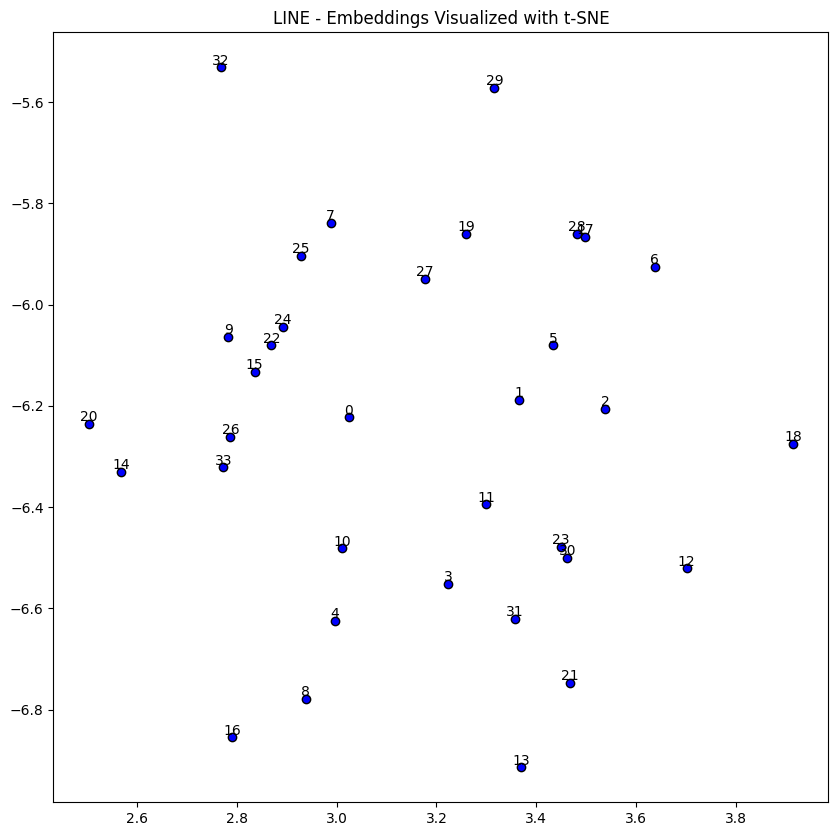

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load the graph
G = nx.karate_club_graph()

# Initialize the model
model = LINE(G, embedding_size=128, order='second')  # order can be ['first', 'second', 'all']
model.train(batch_size=1024, epochs=50, verbose=2)  # Train the model

# Get the embedding vectors
embeddings = model.get_embeddings()

# Convert embeddings to a numpy array for easier handling
nodes = list(embeddings.keys())
emb_array = np.array([embeddings[node] for node in nodes])

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
emb_2d = tsne.fit_transform(emb_array)

# Plot the 2D embeddings
plt.figure(figsize=(10, 10))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c='blue', edgecolors='k')

# Optionally, label the points with node identifiers
for i, node in enumerate(nodes):
    plt.annotate(node, (emb_2d[i, 0], emb_2d[i, 1]), textcoords='offset points', xytext=(0, 2), ha='center')

plt.title('LINE - Embeddings Visualized with t-SNE')
plt.show()


# **7/Asymmetric Transitivity Preserving Graph Embedding (HOPE)**

### Create HOPE

In [109]:
import networkx as nx
import numpy as np
import scipy.sparse.linalg as lg

class HOPE(object):
    def __init__(self, graph, d):
        self._d = d # The dimension of the representation vector (embedding)
        self._graph = graph.G # Stores the NetworkX graph from the Graph object
        self.g = graph # Stores the Graph object
        self._node_num = graph.node_size # Stores the number of nodes in the graph.
        self.learn_embedding()

    def learn_embedding(self):

        graph = self.g.G
        A = nx.to_numpy_array(graph)

        M_g = np.eye(graph.number_of_nodes())
        M_l = np.dot(A, A)

        S = np.dot(np.linalg.inv(M_g), M_l)
        # s: \sigma_k
        u, s, vt = lg.svds(S, k=self._d // 2)
        sigma = np.diagflat(np.sqrt(s))
        X1 = np.dot(u, sigma)
        X2 = np.dot(vt.T, sigma)

        self._X = np.concatenate((X1, X2), axis=1) # Placeholder for the final embeddings

    @property
    def vectors(self):
        vectors = {}
        look_back = self.g.look_back_list
        for i, embedding in enumerate(self._X):
            vectors[look_back[i]] = embedding
        return vectors

    def save_embeddings(self, filename):
        fout = open(filename, 'w')
        node_num = len(self.vectors.keys())
        fout.write("{} {}\n".format(node_num, self._d))
        for node, vec in self.vectors.items():
            fout.write("{} {}\n".format(node,
                                        ' '.join([str(x) for x in vec])))
        fout.close()

class Graph:
    def __init__(self, nx_G):
        self.G = nx_G # Store graph object 
        self.node_size = self.G.number_of_nodes() #Store the number of nodes in the graph
        self.look_back_list = list(self.G.nodes()) # Store list of nodes in the graph

### Train and visualize HOPE

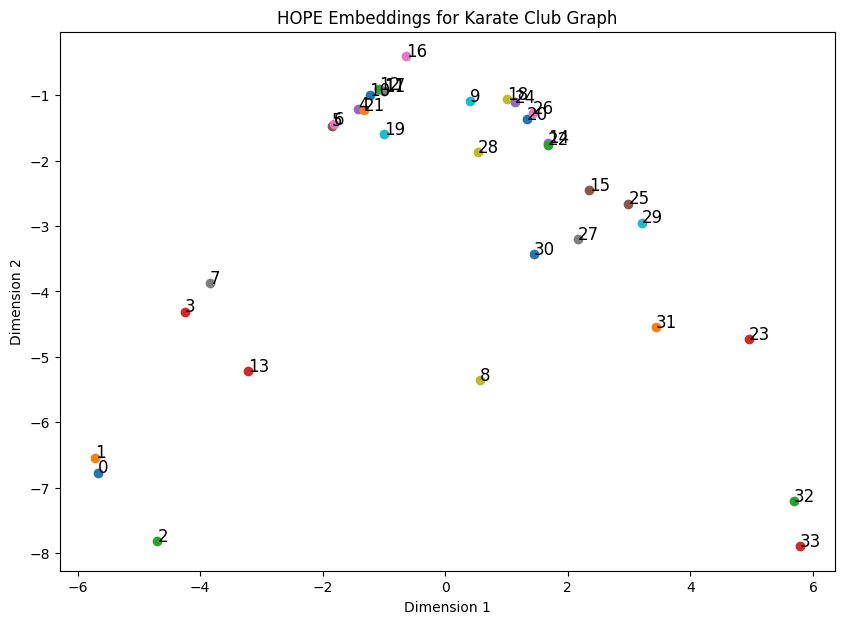

In [110]:
# Create the Karate Club graph
G = nx.karate_club_graph()
graph = Graph(G)

# Initialize HOPE with the graph and desired embedding dimension
hope = HOPE(graph, d=4)

# Get the embeddings
embeddings = hope.vectors

# Visualize the embeddings
def plot_embeddings(embeddings):
    plt.figure(figsize=(10, 7))
    for node, emb in embeddings.items():
        plt.scatter(emb[0], emb[1], marker='o')
        plt.text(emb[0], emb[1], s=str(node), fontsize=12)
    plt.title("HOPE Embeddings for Karate Club Graph")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Plot the embeddings
plot_embeddings(embeddings)

# **8/Struc2Vec: Learning Node Representations from Structural Identity**

## Define functions

In [219]:
# Divide a dictionary of vertices into chunks for parallel processing
def partition_dict(vertices, workers):
    batch_size = (len(vertices) - 1) // workers + 1
    part_list = []
    part = []
    count = 0
    for v1, nbs in vertices.items():
        part.append((v1, nbs))
        count += 1
        if count % batch_size == 0:
            part_list.append(part)
            part = []
    if len(part) > 0:
        part_list.append(part)
    return part_list

# Distribute a number into almost equal parts for workers
def partition_num(num, workers):
    if num % workers == 0:
        return [num // workers] * workers
    else:
        return [num // workers] * workers + [num % workers]

## Create BiasedWalker: simulating biased random walks on the graph

In [220]:
from joblib import Parallel, delayed
import itertools
class BiasedWalker:
    def __init__(self, idx2node, temp_path):

        self.idx2node = idx2node
        self.idx = list(range(len(self.idx2node)))
        self.temp_path = temp_path
        pass

    def simulate_walks(self, num_walks, walk_length, stay_prob=0.3, workers=1, verbose=0):

        layers_adj = pd.read_pickle(self.temp_path + 'layers_adj.pkl')
        layers_alias = pd.read_pickle(self.temp_path + 'layers_alias.pkl')
        layers_accept = pd.read_pickle(self.temp_path + 'layers_accept.pkl')
        gamma = pd.read_pickle(self.temp_path + 'gamma.pkl')

        nodes = self.idx  # list(self.g.nodes())

        results = Parallel(n_jobs=workers, verbose=verbose, )(
            delayed(self._simulate_walks)(nodes, num, walk_length, stay_prob, layers_adj, layers_accept, layers_alias,
                                          gamma) for num in
            partition_num(num_walks, workers))

        walks = list(itertools.chain(*results))
        return walks

    def _simulate_walks(self, nodes, num_walks, walk_length, stay_prob, layers_adj, layers_accept, layers_alias, gamma):
        walks = []
        for _ in range(num_walks):
            random.shuffle(nodes)
            for v in nodes:
                walks.append(self._exec_random_walk(layers_adj, layers_accept, layers_alias,
                                                    v, walk_length, gamma, stay_prob))
        return walks

    def _exec_random_walk(self, graphs, layers_accept, layers_alias, v, walk_length, gamma, stay_prob=0.3):
        initialLayer = 0
        layer = initialLayer

        path = []
        path.append(self.idx2node[v])

        while len(path) < walk_length:
            r = random.random()
            if (r < stay_prob):  # same layer
                v = chooseNeighbor(v, graphs, layers_alias,
                                   layers_accept, layer)
                path.append(self.idx2node[v])
            else:  # different layer
                r = random.random()
                try:
                    x = math.log(gamma[layer][v] + math.e)
                    p_moveup = (x / (x + 1))
                except:
                    print(layer, v)
                    raise ValueError()

                if (r > p_moveup):
                    if (layer > initialLayer):
                        layer = layer - 1
                else:
                    if ((layer + 1) in graphs and v in graphs[layer + 1]):
                        layer = layer + 1

        return path


def chooseNeighbor(v, graphs, layers_alias, layers_accept, layer):
    v_list = graphs[layer][v]

    idx = alias_sample(layers_accept[layer][v], layers_alias[layer][v])
    v = v_list[idx]

    return v

### Word2Vec

In [221]:
import numpy as np
from collections import defaultdict
from tqdm import tqdm

class Word2Vec:
    def __init__(self, sentences=None, size=100, vector_size=100, seed=0, workers=4, window=5, negative=5, alpha=0.025, min_count=1, hs=1, sg=1, epochs=100, iter=5, num_threads=4):
        self.sentences = sentences
        self.size = size
        self.window = window
        self.negative = negative
        self.alpha = alpha
        self.iter = iter
        self.min_count = min_count
        self.sg = sg
        self.hs = hs
        self.epochs = epochs
        self.num_threads = num_threads
        self.vocab = defaultdict(int)
        self.table = None
        self.table_size = int(1e8)
        self.syn0 = None
        self.syn1neg = None
        self.vector_size = vector_size
        self.seed = seed
        self.workers = workers
        self.wv = {}

    def build_vocab(self):
        for sentence in self.sentences:
            for word in sentence:
                self.vocab[word] += 1

        self.index2word = [word for word, count in self.vocab.items() if count >= self.min_count]
        self.word2index = {word: idx for idx, word in enumerate(self.index2word)}

        print(f"Vocabulary size: {len(self.vocab)}")
        print(f"Filtered vocabulary size: {len(self.index2word)}")

    def train(self):
        self.build_vocab()
        self.init_weights()
        self.train_process()
        self.wv = {word: self.syn0[idx] for word, idx in self.word2index.items()}  # Set the wv attribute

    def init_weights(self):
        vocab_size = len(self.index2word)
        self.syn0 = np.random.uniform(-0.5 / self.size, 0.5 / self.size, (vocab_size, self.size))
        self.syn1neg = np.zeros((vocab_size, self.size))

    def train_process(self):
        for i in tqdm(range(self.iter), desc="Training"):
            for sentence in self.sentences:
                self.train_epoch(sentence)

    def train_epoch(self, sentence):
        for i, word in enumerate(sentence):
            if word not in self.word2index:
                continue
            word_idx = self.word2index[word]
            start = max(0, i - self.window)
            end = min(len(sentence), i + self.window + 1)
            for j in range(start, end):
                if j != i:
                    context_word = sentence[j]
                    if context_word in self.word2index:
                        context_idx = self.word2index[context_word]
                        self.train_pair(word_idx, context_idx)

    def train_pair(self, word_idx, context_idx):
        l1 = self.syn0[word_idx]
        l2 = self.syn1neg[context_idx]

        product = np.dot(l1, l2)
        g = self.alpha * (1 - product)

        self.syn0[word_idx] += g * l2
        self.syn1neg[context_idx] += g * l1

    def get_embeddings(self):
        return self.wv


## Create Struc2Vec

In [224]:
import math
import os
import shutil
from collections import ChainMap, deque

import numpy as np
import pandas as pd
from fastdtw import fastdtw
from joblib import Parallel, delayed


class Struc2Vec():
    def __init__(self, graph, walk_length=10, num_walks=100, workers=1, verbose=0, stay_prob=0.3, opt1_reduce_len=True,
                 opt2_reduce_sim_calc=True, opt3_num_layers=None, temp_path='./temp_struc2vec/', reuse=False):
        self.graph = graph
        self.idx2node, self.node2idx = preprocess_nxgraph(graph)
        self.idx = list(range(len(self.idx2node)))

        self.opt1_reduce_len = opt1_reduce_len
        self.opt2_reduce_sim_calc = opt2_reduce_sim_calc
        self.opt3_num_layers = opt3_num_layers

        self.resue = reuse
        self.temp_path = temp_path

        if not os.path.exists(self.temp_path):
            os.mkdir(self.temp_path)
        if not reuse:
            shutil.rmtree(self.temp_path)
            os.mkdir(self.temp_path)

        self.create_context_graph(self.opt3_num_layers, workers, verbose)
        self.prepare_biased_walk()
        self.walker = BiasedWalker(self.idx2node, self.temp_path)
        self.sentences = self.walker.simulate_walks(
            num_walks, walk_length, stay_prob, workers, verbose)

        self._embeddings = {}

    def create_context_graph(self, max_num_layers, workers=1, verbose=0, ):

        pair_distances = self._compute_structural_distance(
            max_num_layers, workers, verbose, )
        layers_adj, layers_distances = self._get_layer_rep(pair_distances)
        pd.to_pickle(layers_adj, self.temp_path + 'layers_adj.pkl')

        layers_accept, layers_alias = self._get_transition_probs(
            layers_adj, layers_distances)
        pd.to_pickle(layers_alias, self.temp_path + 'layers_alias.pkl')
        pd.to_pickle(layers_accept, self.temp_path + 'layers_accept.pkl')

    # Prepare biased walk
    def prepare_biased_walk(self, ):

        sum_weights = {}
        sum_edges = {}
        average_weight = {}
        gamma = {}
        layer = 0
        while (os.path.exists(self.temp_path + 'norm_weights_distance-layer-' + str(layer) + '.pkl')):
            probs = pd.read_pickle(
                self.temp_path + 'norm_weights_distance-layer-' + str(layer) + '.pkl')
            for v, list_weights in probs.items():
                sum_weights.setdefault(layer, 0)
                sum_edges.setdefault(layer, 0)
                sum_weights[layer] += sum(list_weights)
                sum_edges[layer] += len(list_weights)

            average_weight[layer] = sum_weights[layer] / sum_edges[layer]

            gamma.setdefault(layer, {})

            for v, list_weights in probs.items():
                num_neighbours = 0
                for w in list_weights:
                    if (w > average_weight[layer]):
                        num_neighbours += 1
                gamma[layer][v] = num_neighbours

            layer += 1

        pd.to_pickle(average_weight, self.temp_path + 'average_weight')
        pd.to_pickle(gamma, self.temp_path + 'gamma.pkl')

    def train(self, embed_size=128, window_size=5, workers=3, iter=5):
        # pd.read_pickle(self.temp_path+'walks.pkl')
        sentences = self.sentences

        print("Learning representation...")
        model = Word2Vec(sentences=sentences, size=embed_size, window=window_size, seed=0, workers=workers, negative=5, alpha=0.025, min_count=0, hs=1, sg=1, epochs=iter, iter=iter, num_threads=workers)  # Adjust parameters as needed
        model.train()  # Train the model
        print("Learning representation done!")
        self.w2v_model = model

        return model
    
    #Get Embeddings
    def get_embeddings(self, ):
        if self.w2v_model is None:
            print("model not train")
            return {}

        self._embeddings = {}
        for word in self.graph.nodes():
            self._embeddings[word] = self.w2v_model.wv[word]
        return self._embeddings

    def _compute_ordered_degreelist(self, max_num_layers):

        degreeList = {}
        vertices = self.idx  # self.g.nodes()
        for v in vertices:
            degreeList[v] = self._get_order_degreelist_node(v, max_num_layers)
        return degreeList

    def _get_order_degreelist_node(self, root, max_num_layers=None):
        if max_num_layers is None:
            max_num_layers = float('inf')

        ordered_degree_sequence_dict = {}
        visited = [False] * len(self.graph.nodes())
        queue = deque()
        level = 0
        queue.append(root)
        visited[root] = True

        while (len(queue) > 0 and level <= max_num_layers):

            count = len(queue)
            if self.opt1_reduce_len:
                degree_list = {}
            else:
                degree_list = []
            while (count > 0):

                top = queue.popleft()
                node = self.idx2node[top]
                degree = len(self.graph[node])

                if self.opt1_reduce_len:
                    degree_list[degree] = degree_list.get(degree, 0) + 1
                else:
                    degree_list.append(degree)

                for nei in self.graph[node]:
                    nei_idx = self.node2idx[nei]
                    if not visited[nei_idx]:
                        visited[nei_idx] = True
                        queue.append(nei_idx)
                count -= 1
            if self.opt1_reduce_len:
                orderd_degree_list = [(degree, freq)
                                      for degree, freq in degree_list.items()]
                orderd_degree_list.sort(key=lambda x: x[0])
            else:
                orderd_degree_list = sorted(degree_list)
            ordered_degree_sequence_dict[level] = orderd_degree_list
            level += 1

        return ordered_degree_sequence_dict

    def _compute_structural_distance(self, max_num_layers, workers=1, verbose=0, ):

        if os.path.exists(self.temp_path + 'structural_dist.pkl'):
            structural_dist = pd.read_pickle(
                self.temp_path + 'structural_dist.pkl')
        else:
            if self.opt1_reduce_len:
                dist_func = cost_max
            else:
                dist_func = cost

            if os.path.exists(self.temp_path + 'degreelist.pkl'):
                degreeList = pd.read_pickle(self.temp_path + 'degreelist.pkl')
            else:
                degreeList = self._compute_ordered_degreelist(max_num_layers)
                pd.to_pickle(degreeList, self.temp_path + 'degreelist.pkl')

            if self.opt2_reduce_sim_calc:
                degrees = self._create_vectors()
                degreeListsSelected = {}
                vertices = {}
                n_nodes = len(self.idx)
                for v in self.idx:  # c:list of vertex
                    nbs = get_vertices(
                        v, len(self.graph[self.idx2node[v]]), degrees, n_nodes)
                    vertices[v] = nbs  # store nbs
                    degreeListsSelected[v] = degreeList[v]  # store dist
                    for n in nbs:
                        # store dist of nbs
                        degreeListsSelected[n] = degreeList[n]
            else:
                vertices = {}
                for v in degreeList:
                    vertices[v] = [vd for vd in degreeList.keys() if vd > v]

            results = Parallel(n_jobs=workers, verbose=verbose, )(
                delayed(compute_dtw_dist)(part_list, degreeList, dist_func) for part_list in
                partition_dict(vertices, workers))
            dtw_dist = dict(ChainMap(*results))

            structural_dist = convert_dtw_struc_dist(dtw_dist)
            pd.to_pickle(structural_dist, self.temp_path +
                         'structural_dist.pkl')

        return structural_dist

    def _create_vectors(self):
        degrees = {}  # sotre v list of degree
        degrees_sorted = set()  # store degree
        G = self.graph
        for v in self.idx:
            degree = len(G[self.idx2node[v]])
            degrees_sorted.add(degree)
            if (degree not in degrees):
                degrees[degree] = {}
                degrees[degree]['vertices'] = []
            degrees[degree]['vertices'].append(v)
        degrees_sorted = np.array(list(degrees_sorted), dtype='int')
        degrees_sorted = np.sort(degrees_sorted)

        l = len(degrees_sorted)
        for index, degree in enumerate(degrees_sorted):
            if (index > 0):
                degrees[degree]['before'] = degrees_sorted[index - 1]
            if (index < (l - 1)):
                degrees[degree]['after'] = degrees_sorted[index + 1]

        return degrees

    def _get_layer_rep(self, pair_distances):
        layer_distances = {}
        layer_adj = {}
        for v_pair, layer_dist in pair_distances.items():
            for layer, distance in layer_dist.items():
                vx = v_pair[0]
                vy = v_pair[1]

                layer_distances.setdefault(layer, {})
                layer_distances[layer][vx, vy] = distance

                layer_adj.setdefault(layer, {})
                layer_adj[layer].setdefault(vx, [])
                layer_adj[layer].setdefault(vy, [])
                layer_adj[layer][vx].append(vy)
                layer_adj[layer][vy].append(vx)

        return layer_adj, layer_distances

    def _get_transition_probs(self, layers_adj, layers_distances):
        layers_alias = {}
        layers_accept = {}

        for layer in layers_adj:

            neighbors = layers_adj[layer]
            layer_distances = layers_distances[layer]
            node_alias_dict = {}
            node_accept_dict = {}
            norm_weights = {}

            for v, neighbors in neighbors.items():
                e_list = []
                sum_w = 0.0

                for n in neighbors:
                    if (v, n) in layer_distances:
                        wd = layer_distances[v, n]
                    else:
                        wd = layer_distances[n, v]
                    w = np.exp(-float(wd))
                    e_list.append(w)
                    sum_w += w

                e_list = [x / sum_w for x in e_list]
                norm_weights[v] = e_list
                accept, alias = create_alias_table(e_list)
                node_alias_dict[v] = alias
                node_accept_dict[v] = accept

            pd.to_pickle(
                norm_weights, self.temp_path + 'norm_weights_distance-layer-' + str(layer) + '.pkl')

            layers_alias[layer] = node_alias_dict
            layers_accept[layer] = node_accept_dict

        return layers_accept, layers_alias


def cost(a, b):
    ep = 0.5
    m = max(a, b) + ep
    mi = min(a, b) + ep
    return ((m / mi) - 1)


def cost_min(a, b):
    ep = 0.5
    m = max(a[0], b[0]) + ep
    mi = min(a[0], b[0]) + ep
    return ((m / mi) - 1) * min(a[1], b[1])


def cost_max(a, b):
    ep = 0.5
    m = max(a[0], b[0]) + ep
    mi = min(a[0], b[0]) + ep
    return ((m / mi) - 1) * max(a[1], b[1])


def convert_dtw_struc_dist(distances, startLayer=1):
    """

    :param distances: dict of dict
    :param startLayer:
    :return:
    """
    for vertices, layers in distances.items():
        keys_layers = sorted(layers.keys())
        startLayer = min(len(keys_layers), startLayer)
        for layer in range(0, startLayer):
            keys_layers.pop(0)

        for layer in keys_layers:
            layers[layer] += layers[layer - 1]
    return distances


def get_vertices(v, degree_v, degrees, n_nodes):
    a_vertices_selected = 2 * math.log(n_nodes, 2)
    vertices = []
    try:
        c_v = 0

        for v2 in degrees[degree_v]['vertices']:
            if (v != v2):
                vertices.append(v2)  # same degree
                c_v += 1
                if (c_v > a_vertices_selected):
                    raise StopIteration

        if ('before' not in degrees[degree_v]):
            degree_b = -1
        else:
            degree_b = degrees[degree_v]['before']
        if ('after' not in degrees[degree_v]):
            degree_a = -1
        else:
            degree_a = degrees[degree_v]['after']
        if (degree_b == -1 and degree_a == -1):
            raise StopIteration  # not anymore v
        degree_now = verifyDegrees(degrees, degree_v, degree_a, degree_b)
        # nearest valid degree
        while True:
            for v2 in degrees[degree_now]['vertices']:
                if (v != v2):
                    vertices.append(v2)
                    c_v += 1
                    if (c_v > a_vertices_selected):
                        raise StopIteration

            if (degree_now == degree_b):
                if ('before' not in degrees[degree_b]):
                    degree_b = -1
                else:
                    degree_b = degrees[degree_b]['before']
            else:
                if ('after' not in degrees[degree_a]):
                    degree_a = -1
                else:
                    degree_a = degrees[degree_a]['after']

            if (degree_b == -1 and degree_a == -1):
                raise StopIteration

            degree_now = verifyDegrees(degrees, degree_v, degree_a, degree_b)

    except StopIteration:
        return list(vertices)


def verifyDegrees(degrees, degree_v_root, degree_a, degree_b):
    if (degree_b == -1):
        degree_now = degree_a
    elif (degree_a == -1):
        degree_now = degree_b
    elif (abs(degree_b - degree_v_root) < abs(degree_a - degree_v_root)):
        degree_now = degree_b
    else:
        degree_now = degree_a

    return degree_now


def compute_dtw_dist(part_list, degreeList, dist_func):
    dtw_dist = {}
    for v1, nbs in part_list:
        lists_v1 = degreeList[v1]  # lists_v1 :orderd degree list of v1
        for v2 in nbs:
            lists_v2 = degreeList[v2]  # lists_v1 :orderd degree list of v2
            max_layer = min(len(lists_v1), len(lists_v2))  # valid layer
            dtw_dist[v1, v2] = {}
            for layer in range(0, max_layer):
                dist, path = fastdtw(
                    lists_v1[layer], lists_v2[layer], radius=1, dist=dist_func)
                dtw_dist[v1, v2][layer] = dist
    return dtw_dist

## Train and visualize Struc2vec

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


Learning representation...
Vocabulary size: 34
Filtered vocabulary size: 34


Training: 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

Learning representation done!


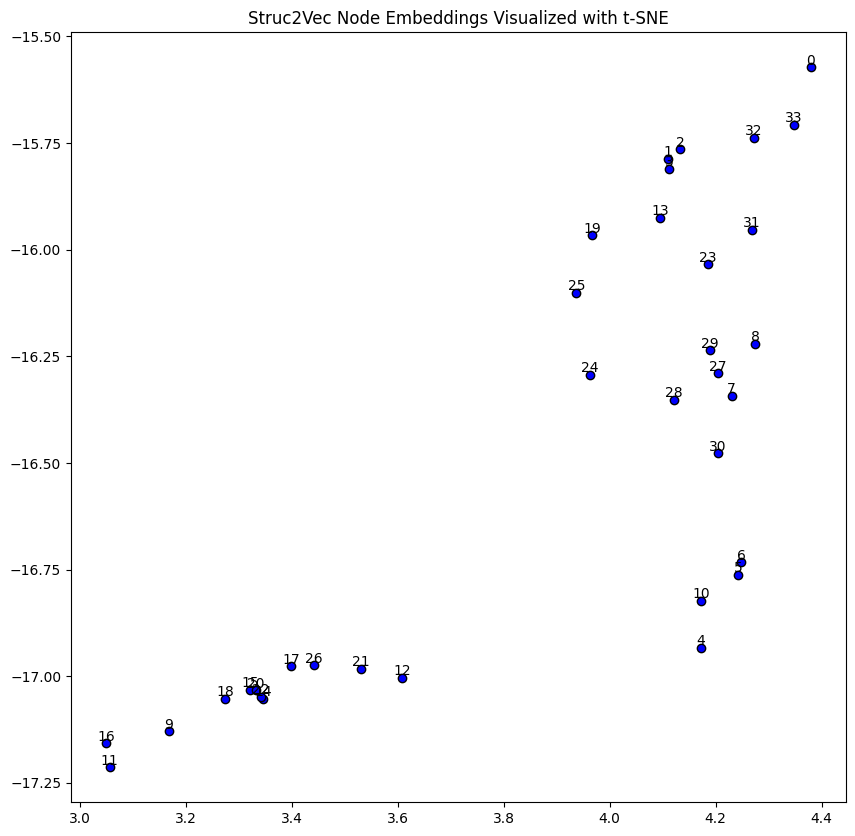

In [225]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Load the Karate Club graph
G = nx.karate_club_graph()

# Initialize the Struc2Vec model
model = Struc2Vec(G, walk_length=10, num_walks=100, workers=4, verbose=1)

# Train the model to get the embeddings
model.train(embed_size=128, window_size=5, workers=4, iter=5)

# Get the embedding vectors
embeddings = model.get_embeddings()

# Convert embeddings to a numpy array for easier handling
nodes = list(embeddings.keys())
emb_array = np.array([embeddings[node] for node in nodes])

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
emb_2d = tsne.fit_transform(emb_array)

# Plot the 2D embeddings
plt.figure(figsize=(10, 10))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c='blue', edgecolors='k')

# Optionally, label the points with node identifiers
for i, node in enumerate(nodes):
    plt.annotate(node, (emb_2d[i, 0], emb_2d[i, 1]), textcoords='offset points', xytext=(0, 2), ha='center')

plt.title('Struc2Vec Node Embeddings Visualized with t-SNE')
plt.show()


# **9/Learning Role-Based Graph Embeddings (Role2Vec)**

### Create Weisfeiler-Lehman (WL) algorithm

#### Extract features from graph nodes through iterative label refinement. 

#### This algorithm helps in graph classification and isomorphism testing by capturing the structural similarities between nodes.

In [233]:
import hashlib

class WeisfeilerLehmanMachine:
    """
    Weisfeiler Lehman feature extractor class.
    """
    def __init__(self, graph, features, iterations):
        """
        Initialization method which executes feature extraction.
        :param graph: The Nx graph object.
        :param features: Feature hash table.
        :param iterations: Number of WL iterations.
        """
        self.iterations = iterations
        self.graph = graph
        self.features = features
        self.nodes = self.graph.nodes()
        self.extracted_features = {k: [v] for k, v in features.items()}
        self.do_recursions()

    def do_a_recursion(self):
        """
        The method does a single WL recursion.
        :return new_features: The hash table with extracted WL features.
        """
        new_features = {}
        for node in self.nodes:
            nebs = self.graph.neighbors(node)
            degs = [self.features[str(neb)] for neb in nebs]
            features = [str(self.features[str(node)])]+sorted([str(deg) for deg in degs])
            features = "_".join(features)
            hash_object = hashlib.md5(features.encode())
            hashing = hash_object.hexdigest()
            new_features[str(node)] = hashing
            self.extracted_features[str(node)].append(hashing)
        return new_features

    def do_recursions(self):
        """
        The method does a series of WL recursions.
        """
        for _ in range(self.iterations):
            self.features = self.do_a_recursion()

### Biased RandomWalk

In [234]:
import random
import numpy as np
import networkx as nx
from tqdm import tqdm

class SecondOrderRandomWalker:
    """
    Class to create second order random walks.
    """
    def __init__(self, G, p, q, num_walks, walk_length):
        """
        :param G: NetworkX object.
        :param p: Return parameter.
        :param q: In-out parameter.
        :param num_walks: Number of walks per source.
        :param walk_length: Number of nodes in walk.
        """
        self.G = G
        self.nodes = nx.nodes(self.G)
        print("Edge weighting.\n")
        for edge in tqdm(self.G.edges()):
            self.G[edge[0]][edge[1]]['weight'] = 1.0
            self.G[edge[1]][edge[0]]['weight'] = 1.0
        self.p = p
        self.q = q
        self.num_walks = num_walks
        self.walk_length = walk_length
        self.preprocess_transition_probs()
        self.simulate_walks()

    def node2vec_walk(self, start_node):
        """
        Simulate a random walk starting from start node.
        """
        G = self.G
        alias_nodes = self.alias_nodes
        alias_edges = self.alias_edges

        walk = [start_node]

        while len(walk) < self.walk_length:
            cur = walk[-1]
            cur_nbrs = sorted(G.neighbors(cur))
            if len(cur_nbrs) > 0:
                if len(walk) == 1:
                    walk.append(cur_nbrs[alias_draw(alias_nodes[cur][0], alias_nodes[cur][1])])
                else:
                    prev = walk[-2]
                    next = cur_nbrs[alias_draw(alias_edges[(prev, cur)][0], alias_edges[(prev, cur)][1])]
                    walk.append(next)
            else:
                break
        walk = [str(node) for node in walk]
        return walk

    def simulate_walks(self):
        """
        Repeatedly simulate random walks from each node.
        """
        G = self.G
        self.walks = []
        nodes = list(G.nodes())
        for iteration in range(self.num_walks):
            print("\nRandom walk round: "+str(iteration+1)+"/"+str(self.num_walks)+".\n")
            random.shuffle(nodes)
            for node in tqdm(nodes):
                self.walks.append(self.node2vec_walk(start_node=node))

    def get_alias_edge(self, src, dst):
        """
        Get the alias edge setup lists for a given edge.
        """
        G = self.G
        p = self.p
        q = self.q

        unnormalized_probs = []
        for dst_nbr in sorted(G.neighbors(dst)):
            if dst_nbr == src:
                unnormalized_probs.append(G[dst][dst_nbr]['weight']/p)
            elif G.has_edge(dst_nbr, src):
                unnormalized_probs.append(G[dst][dst_nbr]['weight'])
            else:
                unnormalized_probs.append(G[dst][dst_nbr]['weight']/q)
        norm_const = sum(unnormalized_probs)
        normalized_probs = [float(u_prob)/norm_const for u_prob in unnormalized_probs]

        return alias_setup(normalized_probs)

    def preprocess_transition_probs(self):
        """
        Preprocessing of transition probabilities for guiding the random walks.
        """
        G = self.G

        alias_nodes = {}
        print("")
        print("Preprocesing.\n")
        for node in tqdm(G.nodes()):
            unnormalized_probs = [G[node][nbr]['weight'] for nbr in sorted(G.neighbors(node))]
            norm_const = sum(unnormalized_probs)
            normalized_probs = [float(u_prob)/norm_const for u_prob in unnormalized_probs]
            alias_nodes[node] = alias_setup(normalized_probs)

        alias_edges = {}
        triads = {}

        for edge in tqdm(G.edges()):
            alias_edges[edge] = self.get_alias_edge(edge[0], edge[1])
            alias_edges[(edge[1], edge[0])] = self.get_alias_edge(edge[1], edge[0])

        self.alias_nodes = alias_nodes
        self.alias_edges = alias_edges


def alias_setup(probs):
    """
    Compute utility lists for non-uniform sampling from discrete distributions.
    """
    K = len(probs)
    q = np.zeros(K)
    J = np.zeros(K, dtype=int)
    smaller = []
    larger = []

    for kk, prob in enumerate(probs):
        q[kk] = K*prob
    if q[kk] < 1.0:
        smaller.append(kk)
    else:
        larger.append(kk)

    while len(smaller) > 0 and len(larger) > 0:
        small = smaller.pop()
        large = larger.pop()

        J[small] = large
        q[large] = q[large] + q[small] - 1.0
        if q[large] < 1.0:
            smaller.append(large)
        else:
            larger.append(large)

    return J, q

def alias_draw(J, q):
    """
    Draw sample from a non-uniform discrete distribution using alias sampling.
    """
    K = len(J)

    kk = int(np.floor(np.random.rand()*K))
    if np.random.rand() < q[kk]:
        return kk
    else:
        return J[kk]


class FirstOrderRandomWalker:
    """
    Class to create first order random walks.
    """
    def __init__(self, G, num_walks, walk_length):
        """
        :param G: NetworkX graph object.
        :param num_walks: Number of walks per source node.
        :param walk_length: Number of nodes in turnctaed randonm walk.
        """
        self.G = G
        self.num_walks = num_walks
        self.walk_length = walk_length
        self.simulate_walks()

    def do_walk(self, node):
        """
        Doing a single truncated random walk from a source node.
        :param node: Source node of the truncated random walk.
        :return walk: A single random walk.
        """
        walk = [node]
        while len(walk) < self.walk_length:
            nebs = [n for n in nx.neighbors(self.G, walk[-1])]
            if len(nebs) == 0:
                break
            walk.append(random.choice(nebs))
        return walk

    def simulate_walks(self):
        """
        Doing a fixed number of truncated random walk from every node in the graph.
        """
        self.walks = []
        for iteration in range(self.num_walks):
            print("\nRandom walk round: "+str(iteration+1)+"/"+str(self.num_walks)+".\n")
            for node in tqdm(self.G.nodes()):
                walk_from_node = self.do_walk(node)
                self.walks.append(walk_from_node)

In [235]:
"""Dataset utilities and printing."""

import pandas as pd
import networkx as nx
from texttable import Texttable
from gensim.models.doc2vec import TaggedDocument

def create_documents(features):
    """
    Created tagged documents object from a dictionary.
    :param features: Keys are document ids and values are strings of the document.
    :return docs: List of tagged documents.
    """
    docs = [TaggedDocument(words=v, tags=[str(k)]) for k, v in features.items()]
    return docs

### MotifCounterMachine 

#### Count graph motifs (small subgraphs) and orbits (specific roles within these motifs). 

#### This provides a way to capture more complex structural patterns in the graph.

In [236]:
"""Heterogeneous Motif Counting Tool."""

import math
import pandas as pd
import networkx as nx
from tqdm import tqdm
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
from networkx.generators.atlas import *

class MotifCounterMachine(object):
    """
    Motif and Orbit Counting Tool.
    """
    # Initializes the machine with the graph and parameters.
    def __init__(self, graph, args):
        """
        Initializing the object.
        :param graph: NetworkX graph.
        :param args: Arguments object.
        """
        self.graph = graph
        self.args = args

    # Generates subsets of edges to identify potential motifs.
    def create_edge_subsets(self):
        """
        Collecting nodes that form graphlets.
        """
        self.edge_subsets = dict()
        subsets = [[edge[0], edge[1]] for edge in self.graph.edges()]
        self.edge_subsets[2] = subsets
        unique_subsets = dict()
        for i in range(3, self.args.graphlet_size+1):
            for subset in tqdm(subsets):
                for node in subset:
                    for neb in self.graph.neighbors(node):
                        new_subset = subset+[neb]
                        if len(set(new_subset)) == i:
                            new_subset.sort()
                            unique_subsets[tuple(new_subset)] = 1
            subsets = [list(k) for k, v in unique_subsets.items()]
            self.edge_subsets[i] = subsets
            unique_subsets = dict()

    # Identifies interesting graphlets (small connected subgraphs) from a predefined collection
    def enumerate_graphs(self):
        """
        Enumerating connected benchmark graphlets.
        """
        graphs = graph_atlas_g()
        self.interesting_graphs = {i: [] for i in range(2, self.args.graphlet_size+1)}
        for graph in graphs:
            if graph.number_of_nodes() > 1 and  graph.number_of_nodes() < self.args.graphlet_size+1:
                if nx.is_connected(graph):
                    self.interesting_graphs[graph.number_of_nodes()].append(graph)

    # Maps different motifs and orbits to unique categories
    def enumerate_categories(self):
        """
        Enumerating orbits in graphlets.
        """
        main_index = 0
        self.categories = dict()
        for size, graphs in self.interesting_graphs.items():
            self.categories[size] = dict()
            for index, graph in enumerate(graphs):
                self.categories[size][index] = dict()
                degrees = list(set([graph.degree(node) for node in graph.nodes()]))
                for degree in degrees:
                    self.categories[size][index][degree] = main_index
                    main_index = main_index + 1
        self.unique_motif_count = main_index + 1

    # Counts the occurrences of each motif/orbit for every node in the graph
    def setup_features(self):
        """
        Calculating the graphlet orbit counts.
        """
        self.features = {n: {i: 0 for i in range(self.unique_motif_count)} for n in self.graph.nodes()}
        for size, node_lists in self.edge_subsets.items():
            graphs = self.interesting_graphs[size]
            for nodes in tqdm(node_lists):
                sub_gr = self.graph.subgraph(nodes)
                for index, graph in enumerate(graphs):
                    if nx.is_isomorphic(sub_gr, graph):
                        for node in sub_gr.nodes():
                            self.features[node][self.categories[size][index][sub_gr.degree(node)]] += 1
                        break

    # Creates a tabular representation of motif counts, which can be further processed or binned
    def create_tabular_motifs(self):
        """
        Creating tabular motifs for factorization.
        """
        self.binned_features = {node: [] for node in self.graph.nodes()}
        self.motifs = [[node]+[self.features[node][index] for index in  range(self.unique_motif_count )] for node in self.graph.nodes()]
        self.motifs = pd.DataFrame(self.motifs)
        self.motifs.columns = ["id"] + ["role_"+str(index) for index in range(self.unique_motif_count)]
        for index in range(self.unique_motif_count):
            features = self.motifs["role_"+str(index)].values.tolist()
            if sum(features) > 0:
                features = [math.log(feature+1) for feature in features]
                features = pd.qcut(features, self.args.quantiles, duplicates="drop", labels=False)
                for node in self.graph.nodes():
                    self.binned_features[node].append(str(int(index*self.args.quantiles + features[node])))
    
    # Create node features either by concatenating quantile bin labels or by factorizing the feature matrix to reduce dimensionality.
    def join_strings(self):
        """
        Creating string labels by joining the individual quantile labels.
        """
        return {str(node): ["_".join(self.binned_features[node])] for node in self.graph.nodes()}

    def factorize_string_matrix(self):
        """
        Creating string labels by factorization.
        """
        rows = [node for node, features in self.binned_features.items() for feature in features]
        columns = [int(feature) for node, features in self.binned_features.items() for feature in features]
        scores = [1 for i in range(len(columns))]
        row_number = max(rows)+1
        column_number = max(columns)+1
        features = csr_matrix((scores, (rows, columns)), shape=(row_number, column_number))
        model = NMF(n_components=self.args.factors, init="random", random_state=self.args.seed, alpha=self.args.beta)
        factors = model.fit_transform(features)
        kmeans = KMeans(n_clusters=self.args.clusters, random_state=self.args.seed).fit(factors)
        labels = kmeans.labels_
        features = {str(node): str(labels[node]) for node in self.graph.nodes()}
        return features

    # Executes the entire motif counting and feature creation process.
    def create_string_labels(self):
        """
        Executing the whole label creation mechanism.
        """
        self.create_edge_subsets()
        self.enumerate_graphs()
        self.enumerate_categories()
        self.setup_features()
        self.create_tabular_motifs()
        if self.args.motif_compression == "string":
            features = self.join_strings()
        else:
            features = self.factorize_string_matrix()
        return features

### Create Role2Vec

In [249]:
import math
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm
from gensim.models.doc2vec import Doc2Vec

class Role2Vec:
    """
    Role2Vec model class.
    """
    # Initializes the model with given parameters and a given graph
    def __init__(self, args):
        """
        Role2Vec machine constructor.
        :param args: Arguments object with the model hyperparameters.
        """
        self.args = args
        self.graph = nx.karate_club_graph()
    
    # Performs random walks on the graph to capture the local structure around each node. 
    # Depending on the sampling method specified, it can perform first-order or second-order random walks
    def do_walks(self):
        """
        Doing first/second order random walks.
        """
        if self.args['sampling'] == "second":
            self.sampler = SecondOrderRandomWalker(self.graph, self.args['P'], self.args['Q'],
                                                   self.args['walk_number'], self.args['walk_length'])
        else:
            self.sampler = FirstOrderRandomWalker(self.graph, self.args['walk_number'], self.args['walk_length'])
        self.walks = self.sampler.walks
        del self.sampler

    # Extracts structural features for nodes using different methods (Weisfeiler-Lehman features, degree features, or motif features)
    def create_structural_features(self):
        """
        Extracting structural features.
        """
        if self.args['features'] == "wl":
            features = {str(node): str(int(math.log(self.graph['degree'](node)+1, self.args['log_base']))) for node in self.graph['nodes']()}
            machine = WeisfeilerLehmanMachine(self.graph, features, self.args['labeling_iterations'])
            machine.do_recursions()
            self.features = machine.extracted_features
        elif self.args['features'] == "degree":
            self.features = {str(node): [str(self.graph.degree(node))] for node in self.graph.nodes()}
        else:
            machine = MotifCounterMachine(self.graph, self.args)
            self.features = machine.create_string_labels()

    # Combines the structural features with the random walks to create a context for each node, aggregating features from nodes encountered during the walks.
    def create_pooled_features(self):
        """
        Pooling the features with the walks
        """
        features = {str(node):[] for node in self.graph.nodes()}
        for walk in self.walks:
            for node_index in range(self.args['walk_length']-self.args['window_size']):
                for j in range(1, self.args['window_size']+1):
                    features[str(walk[node_index])].append(self.features[str(walk[node_index+j])])
                    features[str(walk[node_index+j])].append(self.features[str(walk[node_index])])

        for node, feature_set in features.items():
            features[node] = [feature for feature_elems in feature_set for feature in feature_elems]
        return features
    # Uses the Doc2Vec model to learn embeddings from the pooled features. 
    # The Doc2Vec model treats each node's context as a "document" and learns a vector representation for each node
    def create_embedding(self):
        """
        Fitting an embedding.
        """
        document_collections = create_documents(self.pooled_features)

        model = Doc2Vec(document_collections,
                        vector_size=self.args['dimensions'],
                        window=0,
                        min_count=self.args['min_count'],
                        alpha=self.args['alpha'],
                        dm=0,
                        min_alpha=self.args['min_alpha'],
                        sample=self.args['down_sampling'],
                        workers=self.args['workers'],
                        epochs=self.args['epochs'])

        embedding = np.array([model.docvecs[str(node)] for node in self.graph.nodes()])
        return embedding

    # Combines the steps of pooling features and learning embeddings into a single process.
    def learn_embedding(self):
        """
        Pooling the features and learning an embedding.
        """
        self.pooled_features = self.create_pooled_features()
        self.embedding = self.create_embedding()
    # Saves the learned node embeddings to a CSV file for later use
    def save_embedding(self):
        """
        Function to save the embedding.
        """
        columns = ["id"] + ["x_"+str(x) for x in range(self.embedding.shape[1])]
        ids = np.array([node for node in self.graph.nodes()]).reshape(-1, 1)
        embedding = pd.DataFrame(np.concatenate([ids, self.embedding], axis=1), columns=columns)
        embedding = embedding.sort_values(by=['id'])
        embedding.to_csv(self.args['output'], index=None)

### Train Role2Vec

In [250]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Karate Club network
karate_club = nx.karate_club_graph()

# Define hyperparameters
args = {
    "output": "karate_club_embeddings.csv",
    "dimensions": 128,
    "walk_number": 10,
    "walk_length": 80,
    "window_size": 10,
    "sampling": "second",
    "features": "degree",
    "labeling_iterations": 2,
    "P": 1.0,
    "Q": 1.0,
    "log_base": 2,
    "min_count": 1,
    "alpha": 0.025,
    "min_alpha": 0.00025,
    "down_sampling": 0.001,
    "workers": 4,
    "epochs": 20
}

# Create and run Role2Vec model
role2vec = Role2Vec(args)
role2vec.graph = karate_club  # Set the graph directly
role2vec.do_walks()
role2vec.create_structural_features()
role2vec.learn_embedding()
role2vec.save_embedding()


Edge weighting.



100%|██████████| 78/78 [00:00<00:00, 828242.31it/s]



Preprocesing.



100%|██████████| 78/78 [00:00<00:00, 97833.65it/s]



Random walk round: 1/10.



100%|██████████| 34/34 [00:00<00:00, 10327.06it/s]



Random walk round: 2/10.



100%|██████████| 34/34 [00:00<00:00, 10395.56it/s]



Random walk round: 3/10.



100%|██████████| 34/34 [00:00<00:00, 10156.42it/s]



Random walk round: 4/10.



100%|██████████| 34/34 [00:00<00:00, 10266.83it/s]



Random walk round: 5/10.



100%|██████████| 34/34 [00:00<00:00, 10249.86it/s]



Random walk round: 6/10.



100%|██████████| 34/34 [00:00<00:00, 8970.08it/s]



Random walk round: 7/10.



100%|██████████| 34/34 [00:00<00:00, 9428.52it/s]



Random walk round: 8/10.



100%|██████████| 34/34 [00:00<00:00, 10248.39it/s]



Random walk round: 9/10.



100%|██████████| 34/34 [00:00<00:00, 9714.33it/s]



Random walk round: 10/10.



100%|██████████| 34/34 [00:00<00:00, 10178.90it/s]
/tmp/ipykernel_2137539/1637062296.py:85: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  embedding = np.array([model.docvecs[str(node)] for node in self.graph.nodes()])


### Visualize Role2Vec

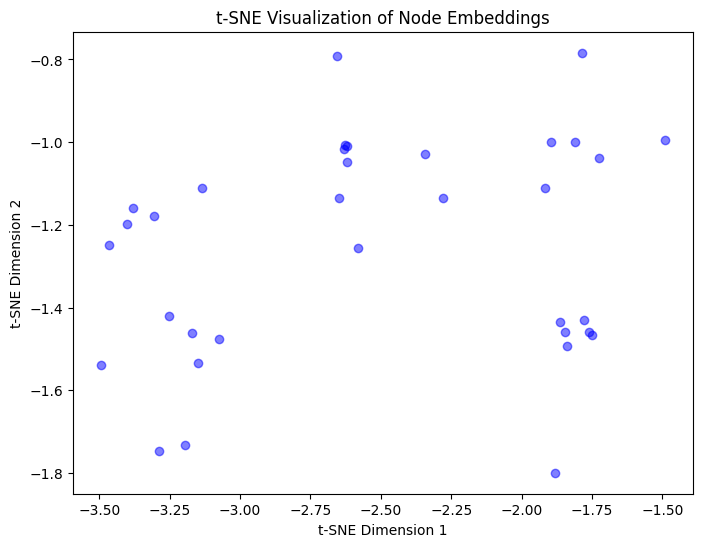

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load the embedding CSV file
embedding_df = pd.read_csv("karate_club_embedding.csv")

# Extract the embedding vectors
embedding_vectors = embedding_df.iloc[:, 1:].values

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(embedding_vectors)

# Plot the embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c='b', alpha=0.5)
plt.title("t-SNE Visualization of Node Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


# **10/metapath2vec: Scalable Representation Learning for Heterogeneous Networks**


### Word2Vec

In [25]:
import numpy as np
import networkx as nx
import random
import threading
from collections import defaultdict

class Word2Vec:
    def __init__(self, vector_size=100, window=5, negative=5, alpha=0.025, min_count=1, sg=1, iter=5, num_threads=4):
        self.window = window
        self.negative = negative
        self.alpha = alpha
        self.min_count = min_count
        self.sg = sg
        self.iter = iter
        self.num_threads = num_threads
        self.vocab = defaultdict(int)
        self.index2word = []
        self.word2index = {}
        self.syn0 = None
        self.syn1neg = None
        self.table = None
        self.table_size = int(1e8)
        self.vector_size = vector_size
        self.size = vector_size
    
    def build_vocab(self, sentences):
        for sentence in sentences:
            for word in sentence:
                self.vocab[word] += 1
        self.vocab = {word: freq for word, freq in self.vocab.items() if freq >= self.min_count}
        self.index2word = list(self.vocab.keys())
        self.word2index = {word: idx for idx, word in enumerate(self.index2word)}
    
    def init_net(self):
        vocab_size = len(self.vocab)
        self.syn0 = (np.random.rand(vocab_size, self.size) - 0.5) / self.size
        self.syn1neg = np.zeros((vocab_size, self.size))
        self.init_unigram_table()
    
    def init_unigram_table(self):
        power = 0.75
        norm = sum([self.vocab[word] ** power for word in self.vocab])
        self.table = []
        for word in self.vocab:
            p = (self.vocab[word] ** power) / norm
            self.table += [self.word2index[word]] * int(p * self.table_size)
        self.table = np.array(self.table)
    
    def train_model_thread(self, sentences, alpha, thread_id):
        random.seed(thread_id)
        for iteration in range(self.iter):
            for sentence in sentences:
                sentence = [word for word in sentence if word in self.vocab]
                for pos, word in enumerate(sentence):
                    current_word_idx = self.word2index[word]
                    context_start = max(0, pos - self.window)
                    context_end = min(len(sentence), pos + self.window + 1)
                    context = [self.word2index[sentence[i]] for i in range(context_start, context_end) if i != pos]
                    self.train_pair(current_word_idx, context, alpha)
    
    def train_pair(self, word_idx, context_idxs, alpha):
        for context_idx in context_idxs:
            self.update(word_idx, context_idx, alpha)
    
    def update(self, word_idx, context_idx, alpha):
        # Negative sampling
        neg_samples = np.random.choice(self.table, size=self.negative)
        labels = np.array([1] + [-1] * self.negative)
        target_idxs = np.array([context_idx] + list(neg_samples))
        
        l2 = self.syn1neg[target_idxs]
        prod_term = np.dot(self.syn0[word_idx], l2.T)
        sigmoid = 1 / (1 + np.exp(-prod_term * labels))
        g = (sigmoid - 1) * labels * alpha
        
        self.syn0[word_idx] -= np.dot(g, l2)
        self.syn1neg[target_idxs] -= np.outer(g, self.syn0[word_idx])
    
    def train(self, sentences):
        self.build_vocab(sentences)
        self.init_net()
        alpha = self.alpha
        thread_data = []
        for thread_id in range(self.num_threads):
            start_idx = thread_id * len(sentences) // self.num_threads
            end_idx = (thread_id + 1) * len(sentences) // self.num_threads
            thread_data.append((sentences[start_idx:end_idx], alpha, thread_id))
        
        threads = [threading.Thread(target=self.train_model_thread, args=data) for data in thread_data]
        for t in threads:
            t.start()
        for t in threads:
            t.join()


### metapath2vec

In [26]:
import numpy as np
import networkx as nx
from collections import defaultdict
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

class Metapath2Vec:
    def __init__(self, graph, output_file, vector_size=100, window=5, min_count=5, workers=4, iter=5, negative=5, alpha=0.025, sample=1e-3):
        # Initialize Metapath2Vec parameters
        self.graph = graph
        self.output_file = output_file
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.iter = iter
        self.negative = negative
        self.alpha = alpha
        self.sample = sample
        self.sentences = []  # List to store generated metapath-based random walks
        
    def read_sentences(self):
        # Generate metapath-based random walks for each node in the graph
        for node in self.graph.nodes():
            self.sentences.extend(self.extract_metapath_walks(node, ['person', 'person'], 10))
    
    def train(self):
        # Train Word2Vec model on generated random walks
        model = Word2Vec(vector_size=self.vector_size, window=self.window, negative=self.negative, alpha=self.alpha, 
                         min_count=self.min_count, sg=1, iter=self.iter, num_threads=self.workers)
        model.train(self.sentences)
        # Save learned node embeddings to file
        self.save_embeddings(model)

    def save_embeddings(self, model):
        # Write learned embeddings to file in the word2vec format
        with open(self.output_file, 'w') as file:
            file.write(f"{len(model.index2word)} {model.size}\n")
            for word in model.index2word:
                vector = ' '.join(map(str, model.syn0[model.word2index[word]]))
                file.write(f"{word} {vector}\n")

    # Extract metapath-based random walks
    def extract_metapath_walks(self, start_node, metapath, walk_length):
        walks = []
        for _ in range(self.iter):
            walk = [start_node]
            current_node = start_node
            current_type_idx = 0
            for _ in range(walk_length - 1):
                current_type = metapath[current_type_idx]
                # Get neighbors of the current node with the specified type
                neighbors = [n for n in self.graph.neighbors(current_node) if self.graph.nodes[n]['type'] == current_type]
                if neighbors:
                    # Choose a random neighbor and append it to the walk
                    current_node = np.random.choice(neighbors)  # Use np.random.choice for consistency
                    walk.append(current_node)
                    current_type_idx = (current_type_idx + 1) % len(metapath)
                else:
                    # If no neighbors with the specified type are found, end the walk
                    break
            walks.append(walk)
        return walks


### Generate node embeddings using metapath2vec and visualize the embedddings

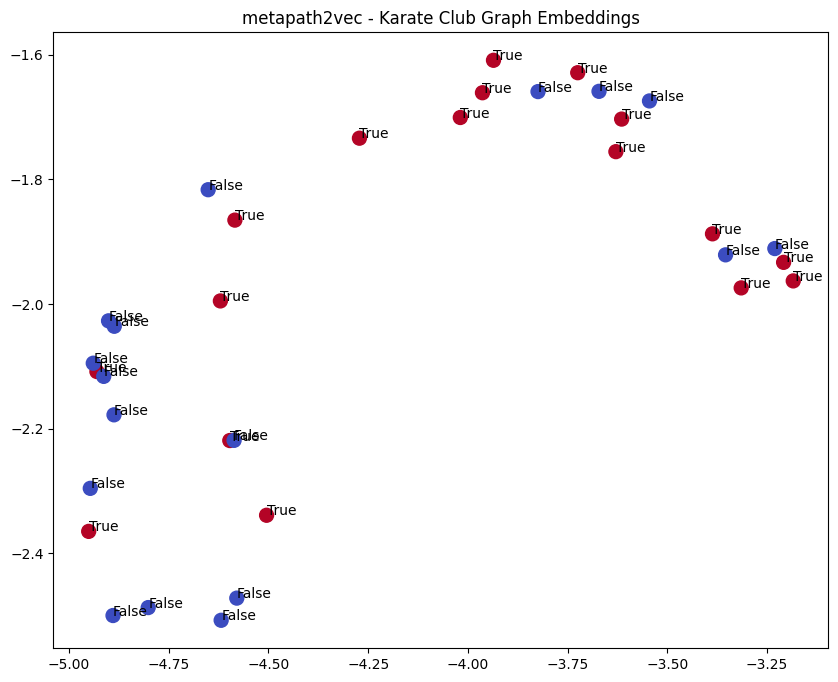

In [27]:
def visualize_embeddings(embeddings, labels):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='coolwarm', s=100)
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    plt.title("metapath2vec - Karate Club Graph Embeddings")
    plt.show()

# Load Karate Club graph from NetworkX
G = nx.karate_club_graph()
for node in G.nodes():
    G.nodes[node]['type'] = 'person'  # Assuming all nodes are of type 'person'

# Train Metapath2Vec model
metapath2vec = Metapath2Vec(G, "karate_club_embeddings.txt", vector_size=128, window=5, min_count=1, workers=4, iter=10, negative=5, alpha=0.025)
metapath2vec.read_sentences()
metapath2vec.train()

# Load embeddings for visualization
embeddings = []
labels = []
with open("karate_club_embeddings.txt", 'r') as file:
    next(file)  # Skip header
    for line in file:
        parts = line.strip().split()
        labels.append(parts[0])
        embeddings.append(np.array(parts[1:], dtype=float))
embeddings = np.array(embeddings)

# Visualize the embeddings
G = nx.karate_club_graph()
colors = [G.nodes[node]['club'] == 'Mr. Hi' for node in G.nodes()]
visualize_embeddings(embeddings, colors)


# **11/dynnode2vec: Scalable Dynamic Network Embedding**


### Word2Vec

In [59]:
class Word2Vec:
    def __init__(self, sentences=None, size=100, vector_size=100, seed=0, workers=4, window=5, negative=5, alpha=0.025, min_count=1, sg=1, iter=5, num_threads=4):
        self.sentences = sentences
        self.size = size
        self.window = window
        self.negative = negative
        self.alpha = alpha
        self.iter = iter
        self.min_count = min_count
        self.sg = sg
        self.num_threads = num_threads
        self.vocab = defaultdict(int)
        self.table = None
        self.table_size = int(1e8)
        self.syn0 = None
        self.syn1neg = None
        self.vector_size = vector_size
        self.seed = seed
        self.workers = workers

    def build_vocab(self):
        for sentence in self.sentences:
            for word in sentence:
                self.vocab[word] += 1

        self.index2word = [word for word, count in self.vocab.items() if count >= self.min_count]
        self.word2index = {word: idx for idx, word in enumerate(self.index2word)}

        print(f"Vocabulary size: {len(self.vocab)}")
        print(f"Filtered vocabulary size: {len(self.index2word)}")

    def train(self):
        self.build_vocab()
        self.init_weights()
        self.train_process()

    def init_weights(self):
        vocab_size = len(self.index2word)
        self.syn0 = np.random.uniform(-0.5 / self.size, 0.5 / self.size, (vocab_size, self.size))
        self.syn1neg = np.zeros((vocab_size, self.size))

    def train_process(self):
        for i in tqdm(range(self.iter), desc="Training"):
            for sentence in self.sentences:
                self.train_epoch(sentence)

    def train_epoch(self, sentence):
        for i, word in enumerate(sentence):
            if word not in self.word2index:
                continue
            word_idx = self.word2index[word]
            start = max(0, i - self.window)
            end = min(len(sentence), i + self.window + 1)
            for j in range(start, end):
                if j != i:
                    context_word = sentence[j]
                    if context_word in self.word2index:
                        context_idx = self.word2index[context_word]
                        self.train_pair(word_idx, context_idx)

    def train_pair(self, word_idx, context_idx):
        l1 = self.syn0[word_idx]
        l2 = self.syn1neg[context_idx]

        product = np.dot(l1, l2)
        g = self.alpha * (1 - product)

        self.syn0[word_idx] += g * l2
        self.syn1neg[context_idx] += g * l1

    def get_embeddings(self):
        return {word: self.syn0[idx] for word, idx in self.word2index.items()}


### Node2Vec

In [60]:
import numpy as np
import random
from collections import defaultdict
from tqdm import tqdm

class Node2Vec:
    def __init__(self, graph, dimensions=128, walk_length=80, num_walks=10, p=1, q=1, workers=1):
        """
        Initiates the Node2Vec object, precomputes walking probabilities and generates the walks.
        """
        self.graph = graph
        for i in range(len(self.graph)):
            self.graph[i, i] = 0
        self.dimensions = dimensions
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.p = p
        self.q = q
        self.workers = workers
        self.first_walk_probability = np.zeros(graph.shape)  # [current, destination]
        self.walk_probability = np.zeros((len(graph), len(graph), len(graph)))  # [last, current, destination]

        self._precompute_probabilities()
        self.walks = self._generate_walks()

    def _precompute_probabilities(self):
        """
        Precomputes transition probabilities for each node.
        """
        print(' Computing prob for first walk...')
        sum_weight = np.sum(self.graph, axis=1)
        sum_weight = np.where(sum_weight == 0, 1, sum_weight)
        normalized_weight = self.graph / np.tile(sum_weight, (len(self.graph), 1)).T
        self.first_walk_probability = normalized_weight

        print(' Computing prob for second walk...')
        for last in range(len(self.graph)):
            for current in range(len(self.graph)):
                if self.graph[last, current] == 0:
                    continue
                unbiased_unnormalized_weight = self.graph[current, :]
                for destination in range(len(self.graph)):
                    if destination == last:
                        unbiased_unnormalized_weight[last] = unbiased_unnormalized_weight[last] / self.p
                    elif self.graph[last, destination] == 0:
                        unbiased_unnormalized_weight[last] = unbiased_unnormalized_weight[last] / self.q
                biased_normalized_weight = unbiased_unnormalized_weight / np.sum(unbiased_unnormalized_weight)
                self.walk_probability[last, current, :] = biased_normalized_weight

    def _generate_walks(self):
        """
        Generates the random walks which will be used as the skip-gram input.
        :return: List of walks. Each walk is a list of nodes.
        """
        all_walks = []
        for n_walk in range(self.num_walks):
            n_th_walks = []
            for source in range(len(self.graph)):
                walk = [source]
                if np.sum(self.first_walk_probability[source, :]) != 0:
                    first_dest = np.random.choice(np.arange(len(self.graph)), 1, p=self.first_walk_probability[source, :])[0]
                    walk.append(first_dest)
                else:
                    walk = [str(source)]
                    n_th_walks.append(walk)
                    continue

                while len(walk) < self.walk_length:
                    if np.sum(self.walk_probability[walk[-2], walk[-1], :]) != 0:
                        dest = np.random.choice(np.arange(len(self.graph)), 1, p=self.walk_probability[walk[-2], walk[-1], :])[0]
                        walk.append(dest)
                    else:
                        break
                walk = [str(elm) for elm in walk]
                n_th_walks.append(walk)

            random.shuffle(n_th_walks)
            all_walks += n_th_walks
        return all_walks

    def fit(self, initial_wv_file=None, save_wv_file=None, **skip_gram_params):
        """
        Creates the embeddings using the provided Word2Vec class.
        """
        print(' Training skip-gram model...')
        model = Word2Vec(sentences=self.walks, vector_size=self.dimensions, workers=self.workers, **skip_gram_params)
        model.train()

        if save_wv_file:
            with open(save_wv_file, 'w') as f:
                for word, vector in model.get_embeddings().items():
                    f.write(f"{word} {' '.join(map(str, vector))}\n")

        return model

In [74]:
def norm_hic(m):
    # Calculate the average values of the diagonals of the input matrix
    average = [np.mean(np.diag(m[i:, :len(m)-i])) for i in range(len(m))]
    
    # Normalize the matrix based on the calculated averages
    for i in range(len(m)):
        if average[i] == 0:
            continue
        for j in range(len(m)-i):
            # Normalize upper triangular elements
            m[j][j+i] = m[j][j+i] / average[i]
            if i != 0:
                # If not on the main diagonal, normalize lower triangular elements
                m[j+i][j] = m[j+i][j] / average[i]
    return m


### Identify temporal changes between two graphs


In [75]:
def get_temporal_changes(graph1, graph2):
    changes = np.where(graph1 != graph2)
    return set(changes[0]).union(set(changes[1]))

### dynnode2vec model

In [76]:
def dynnode2vec(graphs, epochs):
    tot_c = len(graphs) * epochs  # Total number of training iterations
    cnt = 0  # Counter to keep track of the current iteration

    for epoch in range(epochs):  # Loop through each epoch
        for i, graph in enumerate(graphs):  # Loop through each graph
            cnt += 1
            print(f'Training model: {cnt} / {tot_c}')

            # Initialize Node2Vec with the current graph
            n2v = Node2Vec(graph, dimensions=16, walk_length=80, num_walks=15, p=1, q=1, workers=8)

            # Model initialization based on conditions (to be filled later)
            if i == 0 and epoch == 0:
                # First iteration, train model from scratch and save embeddings
                model = n2v.fit(save_wv_file='./temp/wv_0.emb', min_count=1, window=3)
            elif i == 0:
                # First graph of the current epoch, initialize from the last graph of the previous epoch
                model = n2v.fit(initial_wv_file=f'./temp/wv_{len(graphs) - 1}.emb', save_wv_file=f'./temp/wv_{i}.emb', min_count=1, window=2)
            else:
                # For subsequent graphs, initialize from the previous graph's embeddings
                model = n2v.fit(initial_wv_file=f'./temp/wv_{i - 1}.emb', save_wv_file=f'./temp/wv_{i}.emb', min_count=1, window=2)
            if i < len(graphs) - 1:
                # Identify nodes with changes between the current and next graph
                changes = get_temporal_changes(graph, graphs[i + 1])
                # Filter walks to include only those with nodes that have changed
                n2v.walks = [walk for walk in n2v.walks if any(node in changes for node in walk)]

            # Print n2v.walks after each iteration
            print("Walks:", n2v.walks)
    return model



### Generate node embeddings using dynnode2vec and visualize the embedddings

Training model: 1 / 1
 Computing prob for first walk...
 Computing prob for second walk...
 Training skip-gram model...
Vocabulary size: 34
Filtered vocabulary size: 34


Training: 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


Walks: [['29', '33', '19', '33', '30', '33', '18', '33', '28', '2', '7', '3', '7', '3', '12', '0', '4', '6', '5', '10', '4', '0', '10', '5', '10', '5', '0', '2', '28', '31', '33', '31', '32', '30', '8', '2', '1', '2', '13', '2', '7', '3', '13', '1', '30', '1', '30', '33', '14', '33', '8', '33', '13', '2', '7', '1', '2', '9', '2', '13', '33', '18', '32', '18', '33', '8', '0', '19', '33', '8', '30', '8', '0', '7', '1', '19', '0', '8', '30', '32'], ['14', '32', '15', '32', '30', '8', '30', '33', '22', '32', '8', '0', '31', '25', '31', '24', '27', '23', '32', '20', '32', '29', '23', '27', '33', '13', '3', '1', '3', '13', '1', '2', '8', '0', '1', '21', '1', '3', '13', '2', '9', '2', '27', '2', '1', '17', '1', '21', '0', '5', '10', '0', '13', '0', '17', '1', '13', '0', '1', '13', '33', '13', '1', '13', '1', '17', '1', '7', '0', '8', '2', '1', '2', '7', '0', '7', '0', '4', '6', '16'], ['33', '23', '25', '23', '25', '24', '31', '25', '24', '27', '23', '29', '33', '13', '0', '21', '0', '21', '0

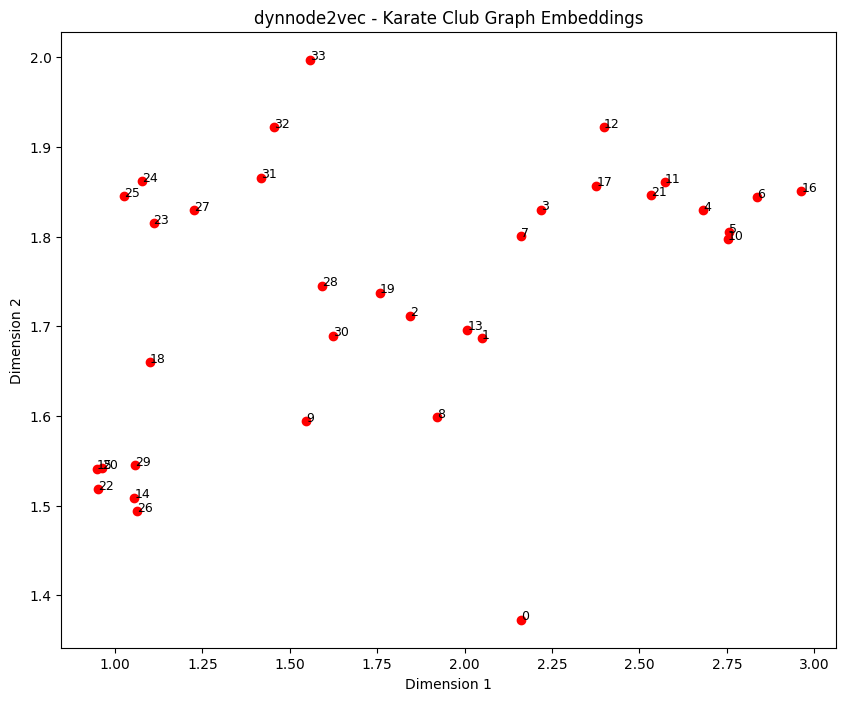

In [77]:
import os
from sklearn.manifold import TSNE
import networkx as nx
import matplotlib.pyplot as plt

# Create the temp directory if it doesn't exist
os.makedirs('./temp', exist_ok=True)

# Load the Karate Club graph
G = nx.karate_club_graph()

# Get the adjacency matrix and normalize it
adj_matrix = nx.to_numpy_array(G)
norm_adj_matrix = norm_hic(adj_matrix.copy())

# Create a list of graphs (only one in this case)
graphs = [norm_adj_matrix]

# Run Node2Vec
model = dynnode2vec(graphs, epochs=1)

# Extract embeddings
embeddings = model.get_embeddings()
nodes = list(embeddings.keys())
vectors = np.array([embeddings[node] for node in nodes])

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings = tsne.fit_transform(vectors)

# Visualize the embeddings
plt.figure(figsize=(10, 8))
for i, node in enumerate(nodes):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], c='red')
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], str(node), fontsize=9)
plt.title('dynnode2vec - Karate Club Graph Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


# **12/Continuous-Time Dynamic Network Embeddings (CTDNE)**

### Word2Vec

In [45]:
class Word2Vec:
    def __init__(self, size=100, window=5, negative=5, alpha=0.025, min_count=1, sg=1, iter=5, num_threads=4):
        self.size = size
        self.window = window
        self.negative = negative
        self.alpha = alpha
        self.min_count = min_count
        self.sg = sg
        self.iter = iter
        self.num_threads = num_threads
        self.vocab = defaultdict(int)
        self.index2word = []
        self.word2index = {}
        self.syn0 = None
        self.syn1neg = None
        self.table = None
        self.table_size = int(1e8)

    def build_vocab(self, sentences):
        for sentence in sentences:
            for word in sentence:
                self.vocab[word] += 1

        self.index2word = [word for word, count in self.vocab.items() if count >= self.min_count]
        self.word2index = {word: idx for idx, word in enumerate(self.index2word)}

        print(f"Vocabulary size: {len(self.vocab)}")
        print(f"Filtered vocabulary size: {len(self.index2word)}")

    def init_weights(self):
        vocab_size = len(self.index2word)
        self.syn0 = np.random.uniform(-0.5 / self.size, 0.5 / self.size, (vocab_size, self.size))
        self.syn1neg = np.zeros((vocab_size, self.size))

    def train(self, sentences):
        self.build_vocab(sentences)
        self.init_weights()

        for i in tqdm(range(self.iter), desc="Training"):
            self.train_epoch(sentences)

    def train_epoch(self, sentences):
        for sentence in sentences:
            for i, word in enumerate(sentence):
                if word not in self.word2index:
                    continue
                word_idx = self.word2index[word]
                start = max(0, i - self.window)
                end = min(len(sentence), i + self.window + 1)
                for j in range(start, end):
                    if j != i:
                        context_word = sentence[j]
                        if context_word in self.word2index:
                            context_idx = self.word2index[context_word]
                            self.train_pair(word_idx, context_idx)

    def train_pair(self, word_idx, context_idx):
        l1 = self.syn0[word_idx]
        l2 = self.syn1neg[context_idx]

        product = np.dot(l1, l2)
        g = self.alpha * (1 - product)

        self.syn0[word_idx] += g * l2
        self.syn1neg[context_idx] += g * l1

    def get_embeddings(self):
        return {word: self.syn0[idx] for word, idx in self.word2index.items()}

### CTDNE model

In [46]:
import networkx as nx
import numpy as np
import pickle
import random

class TimeGraph:
    def __init__(self, graph, time_prop_name):
        self.G = graph
        self.time_prop_name = time_prop_name
        self.edges = list(self.G.edges(data=True))

        self.beta = None  # number of temporal context windows
        self.D = None  # embedding dimension 128
        self.L = None  # max walk length
        self.omega = None  # min walk length / context window size for skip gram

        self.all_time_walks = None
        self.num_nodes = len(list(self.G.nodes()))
        self.num_edges = len(self.edges)

    def set_temporal_walk_params(self, beta, D, omega, L=80):
        self.beta = beta
        self.D = D
        self.L = L
        self.omega = omega

    def sample_edge(self):
        num_edges = len(self.edges)
        choice = np.random.choice(num_edges)
        return self.edges[choice]

    def generate_ctdne_walks(self):  # Algorithm 1 from CTDNE paper
        # collection of random walks
        all_time_walks = []

        # initialize number of context windows
        C = 0
        counter = 0
        while self.beta - C > 0:
            u, v, prop = self.sample_edge()
            t = prop[self.time_prop_name]

            walk_t = self._temporal_walk(start_edge=(u, v), t=t, C=self.omega + self.beta - C - 1)
            if (walk_t is not None) and (len(walk_t) >= self.omega):
                all_time_walks.append(walk_t)
                C = C + (len(walk_t) - self.omega + 1)

            counter += 1
            if (counter + 1) % 1000 == 0:
                print('Loop ran for ', counter + 1, 'times!\t Current C = ', C)

        self.all_time_walks = all_time_walks

    def _temporal_walk(self, start_edge=None, t=None, C=0):  # Algorithm 2 from CTDNE
        """ Returns a random walk that respects time
            start: the start node of the random walk.
        """
        G = self.G
        prop_name = self.time_prop_name

        if start_edge:
            path = [start_edge[0], start_edge[1]]
        else:
            raise ValueError('start_edge should not be None.')

        curr_node = start_edge[1]

        for p in range(1, min(self.L, C)):
            # select next nodes whose time (curr_node, next_node) is greater than t
            neighbor_candidates = []
            for u, v, prop in G.edges(curr_node, data=True):
                if prop[prop_name] >= t:
                    neighbor_candidates.append((v, prop[prop_name]))

            # check if there are valid neighbors to walk to
            if len(neighbor_candidates) > 0:
                # set new current node & t
                idx_next_node = np.random.choice(range(len(neighbor_candidates)))
                curr_node, t = neighbor_candidates[idx_next_node]

                # add new current node to path
                path.append(curr_node)
            else:
                break
        return path


### Save temporal random walk to pkl file

In [47]:
def main():
    graph = nx.karate_club_graph()
    # Assigning random time values for demonstration purposes
    for u, v in graph.edges():
        graph[u][v]['time'] = random.randint(0, 100)

    path = 'karate_club_walks.pkl'

    timeG = TimeGraph(graph, 'time')

    R = 80
    N = timeG.num_nodes
    omega = 10
    L = 80
    beta = R * N * (L - omega + 1)

    print("Beta value:", beta)

    print("Started Walk...")

    timeG.set_temporal_walk_params(beta=beta, D=128, omega=omega, L=L)
    timeG.generate_ctdne_walks()

    ctdne_walks = timeG.all_time_walks

    with open(path, 'wb') as f:
        pickle.dump(ctdne_walks, f)


if __name__ == '__main__':
    main()

Beta value: 193120
Started Walk...
Loop ran for  1000 times!	 Current C =  71928
Loop ran for  2000 times!	 Current C =  143928


### Generate node embeddings using CTDNE and visualize the embedddings

Vocabulary size: 34
Filtered vocabulary size: 34


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Training: 100%|██████████| 5/5 [00:23<00:00,  4.71s/it]


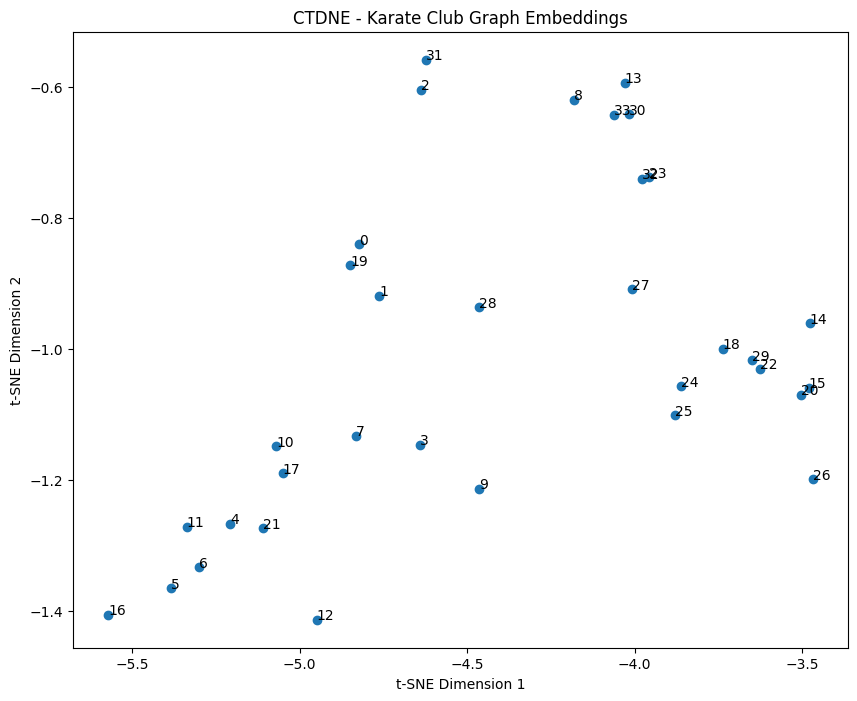

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load karate club walks
with open("karate_club_walks.pkl", "rb") as f:
    karate_club_walks = pickle.load(f)

# Generate karate club graph
graph = nx.karate_club_graph()

# Train Word2Vec model
w2v_model = Word2Vec(size=128)
w2v_model.train(karate_club_walks)

# Get node embeddings
node_embeddings = w2v_model.get_embeddings()

# Convert embeddings to numpy array
node_embeddings_np = np.array(list(node_embeddings.values()))

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
node_embeddings_tsne = tsne.fit_transform(node_embeddings_np)

# Visualize node embeddings
plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_tsne[:, 0], node_embeddings_tsne[:, 1])
for i, txt in enumerate(node_embeddings.keys()):
    plt.annotate(txt, (node_embeddings_tsne[i, 0], node_embeddings_tsne[i, 1]))
plt.title('CTDNE - Karate Club Graph Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()